## Experiment 1: Working with Python packages-Numpy, Scipy, Scikit-Learn, Matplotlib

### Importing required python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras

import torch
import torch.nn as nn
import torch.optim as optim
import os
import time
import cv2

plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 15,
    "axes.titlesize": 15,
    "axes.titleweight": "bold",
    "axes.labelsize": 15,
    "axes.labelweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
})

c:\Users\SSN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Dataset 1 -  Loan amount prediction

In [125]:
# Loading the dataset 1 - loan amount prediction
df=pd.read_csv("loan_data.csv")
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

#### Dataset related Information


In [3]:
# Dataset Columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# Statistics summary of the numerical columns
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [5]:
# List of columns in the dataset
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
# Number of rows and columns of the Dataset 
df.shape

(45000, 14)

In [7]:
# Checking if any null / missing values present
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
# Unique values of column 'person_age'
df['person_age'].unique()

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

In [9]:
# storing numerical columns which have unique values more than 10
num_cols = [
    col for col in df.select_dtypes(include="number").columns
    if df[col].nunique() > 10
]


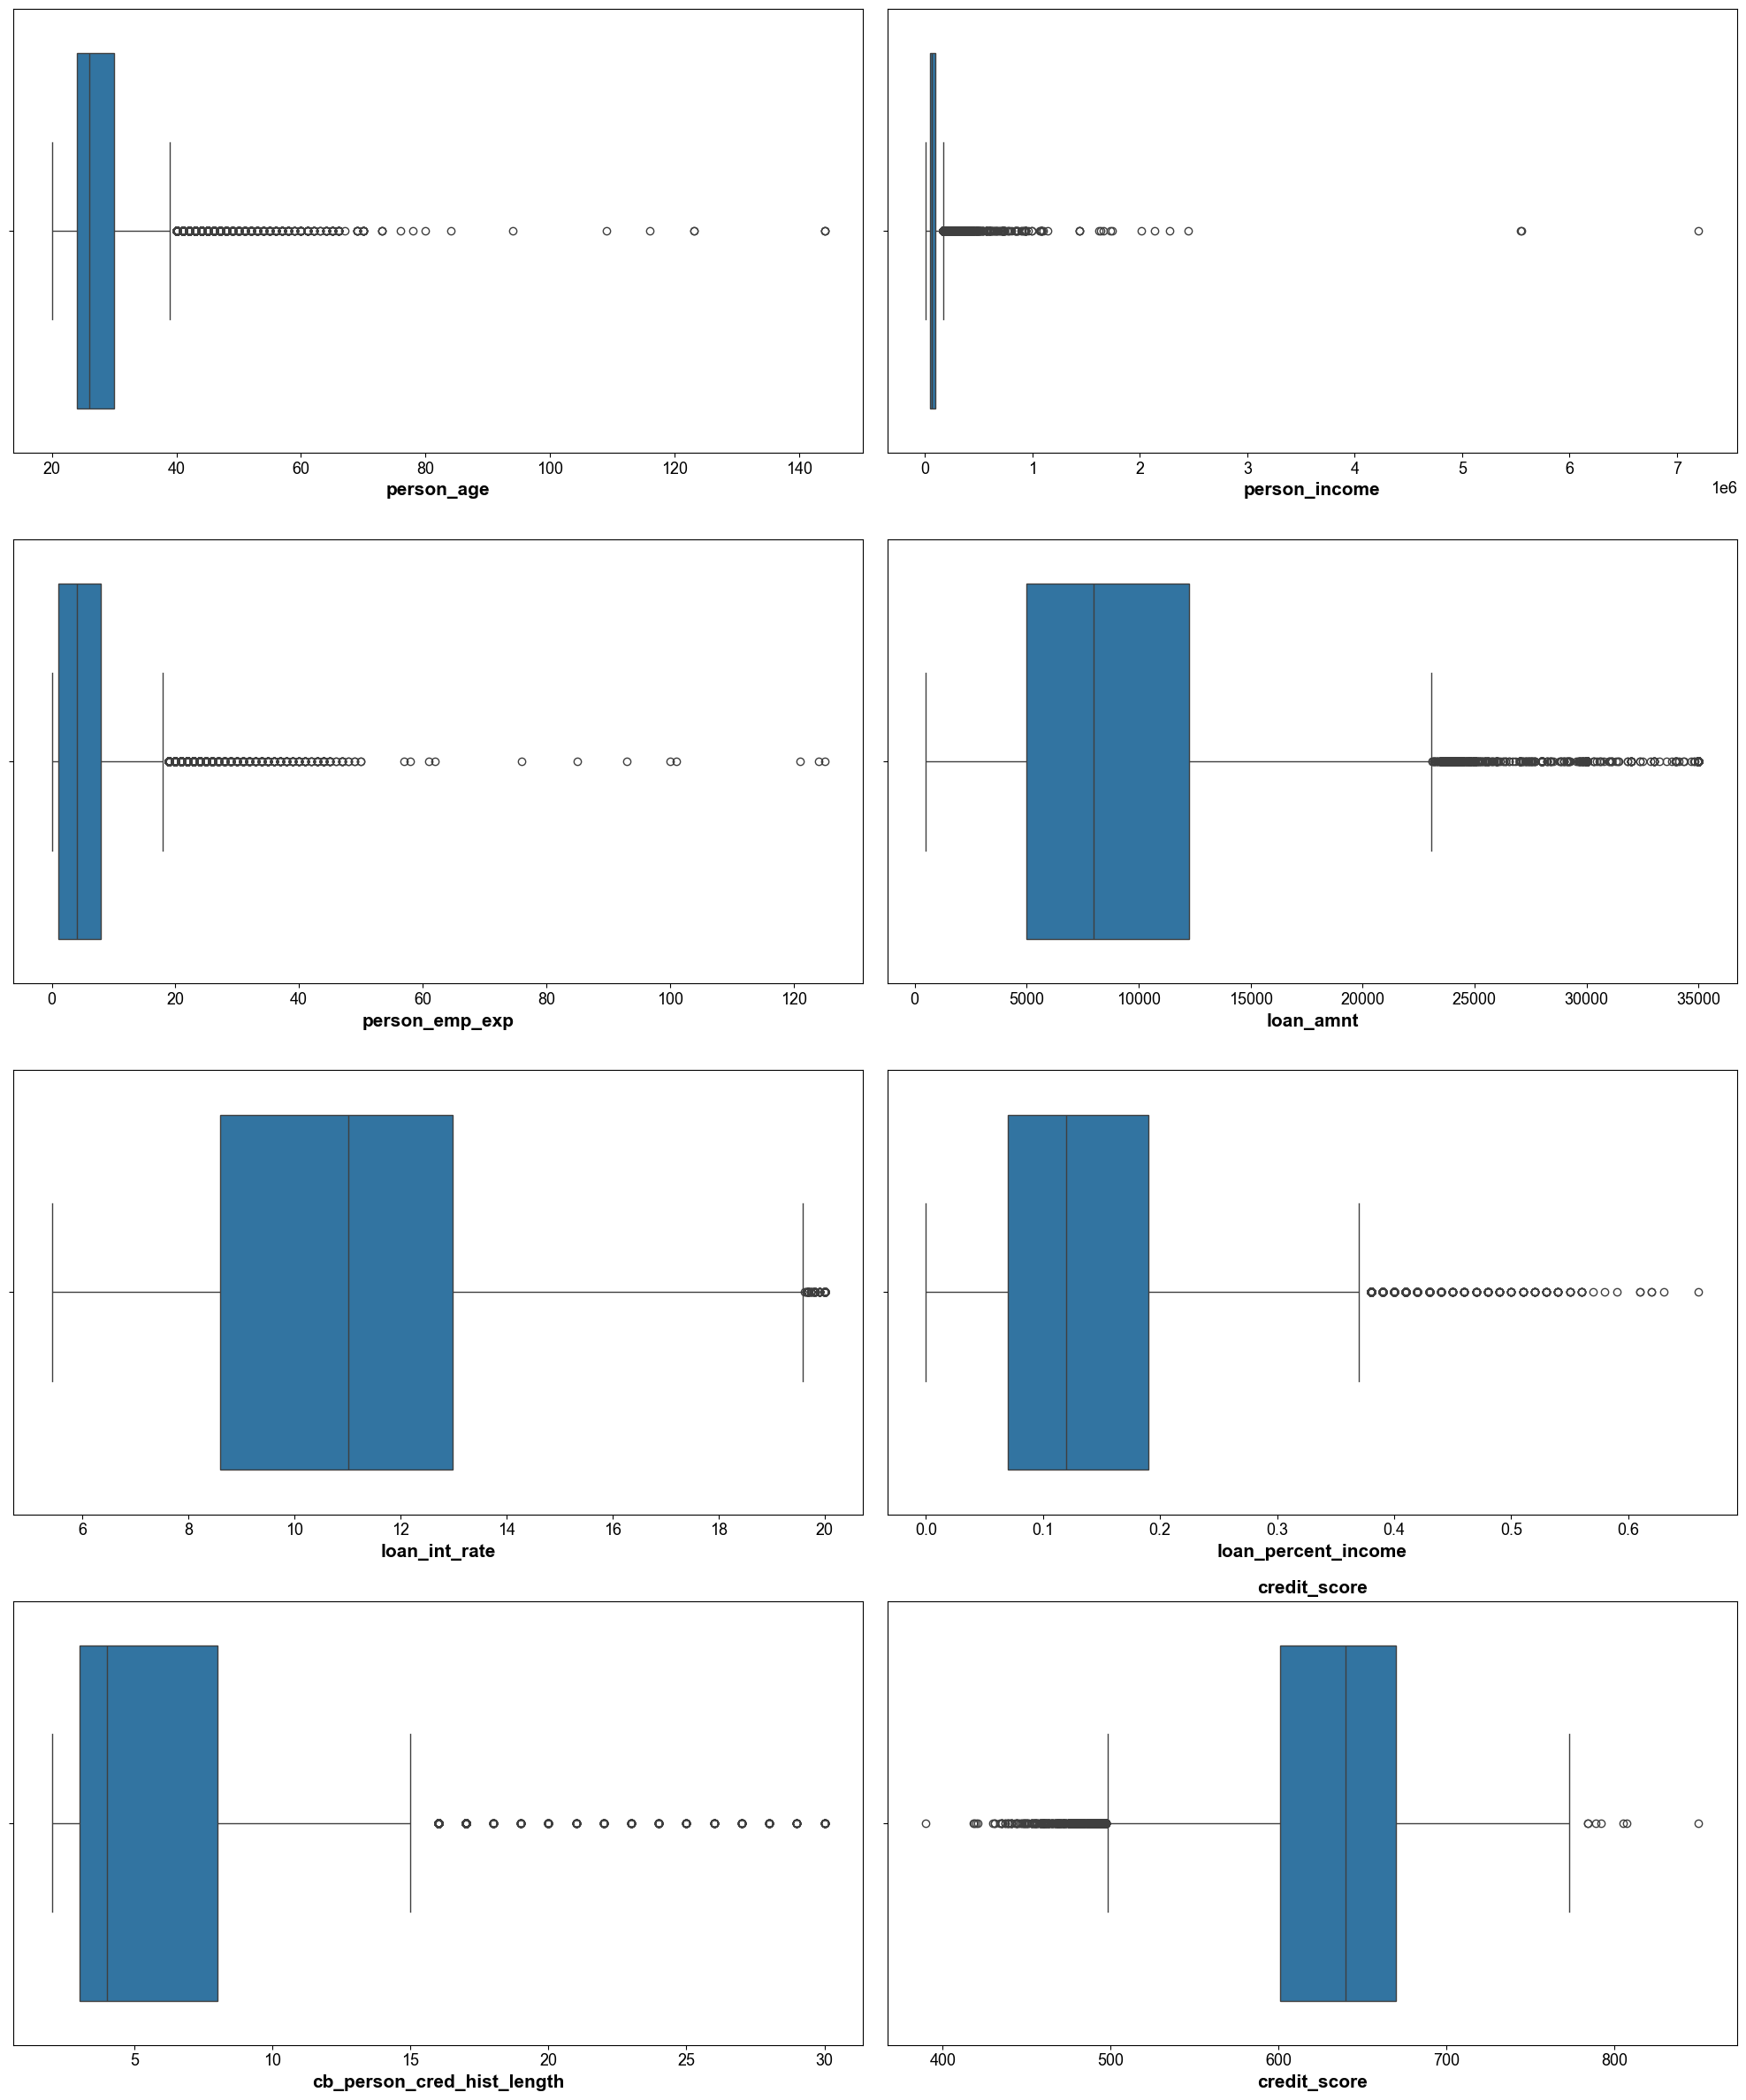

In [19]:
# Plotting boxplot for numerical columns
ncols = 2
nrows = (len(num_cols) + ncols - 1) // ncols
fig, axes = plt.subplots( nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    plt.title(col)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

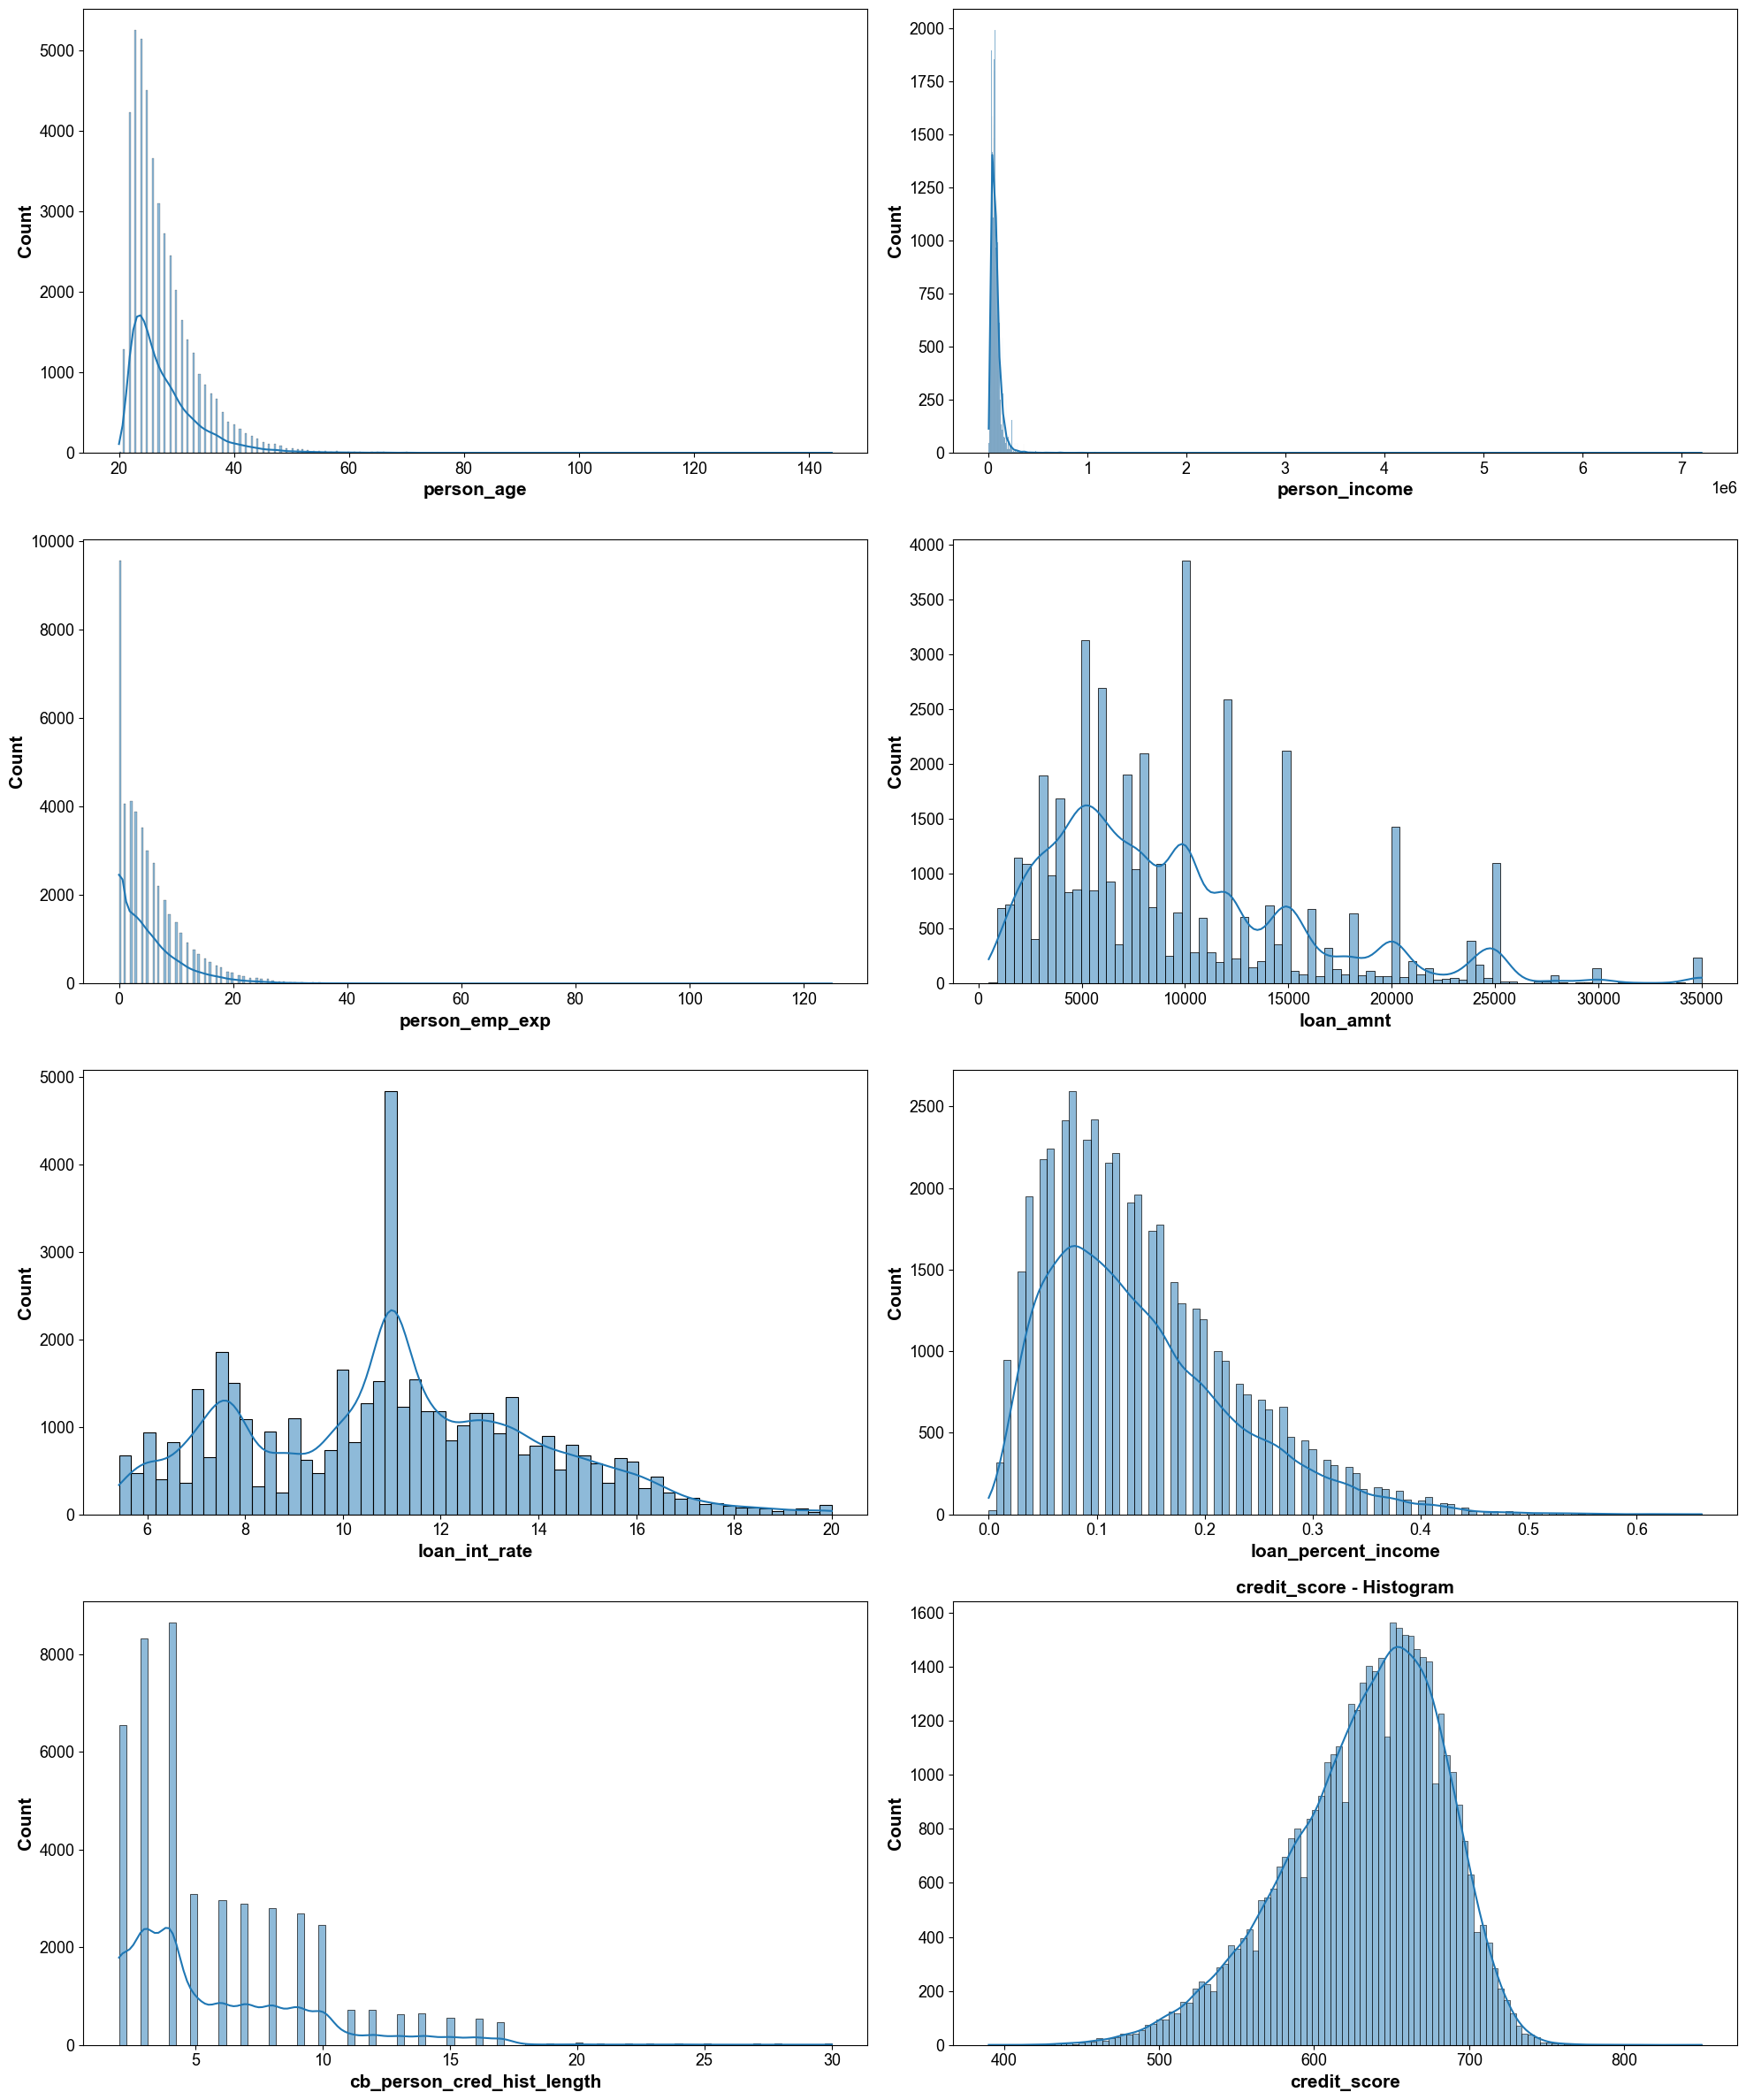

In [20]:
# Plotting histogram with kde for numerical columns
ncols = 2
nrows = (len(num_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
# Flatten axes to always use single index
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

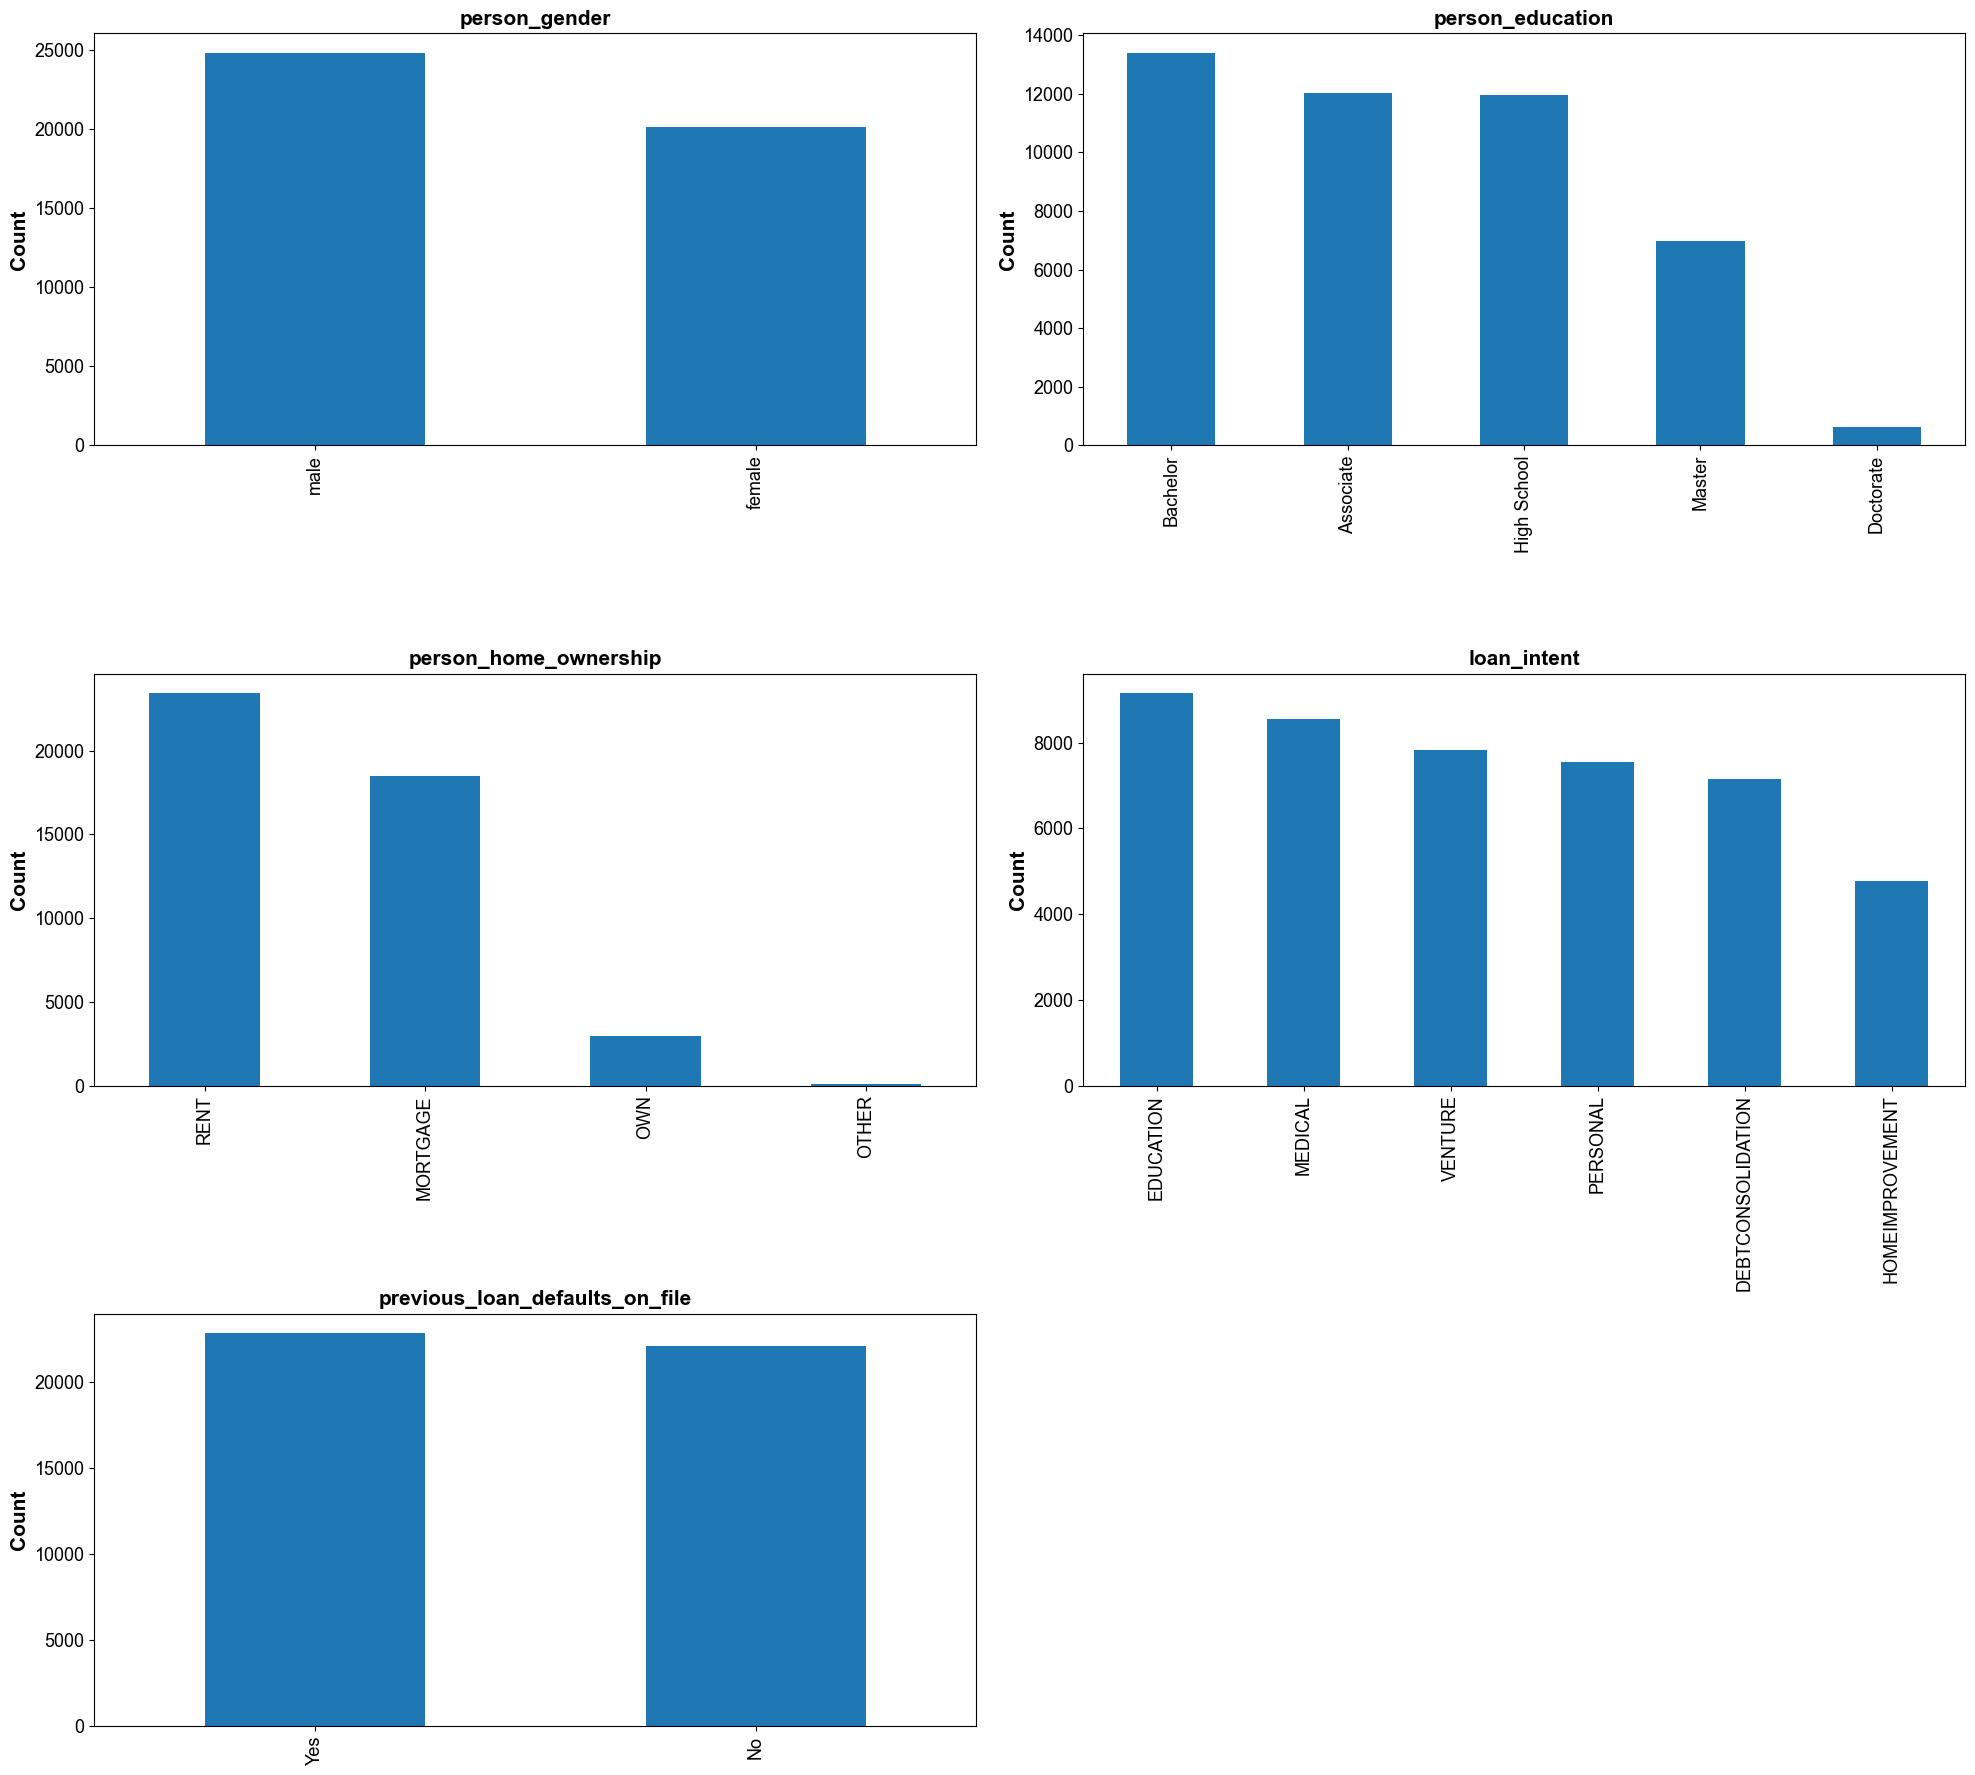

In [ ]:
# Storing Categorical columns
cat_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Plotting bar plot for categorical columns
ncols = 2
nrows = (len(cat_cols) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
# Make axes always a flat array
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
# Plot each categorical column
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

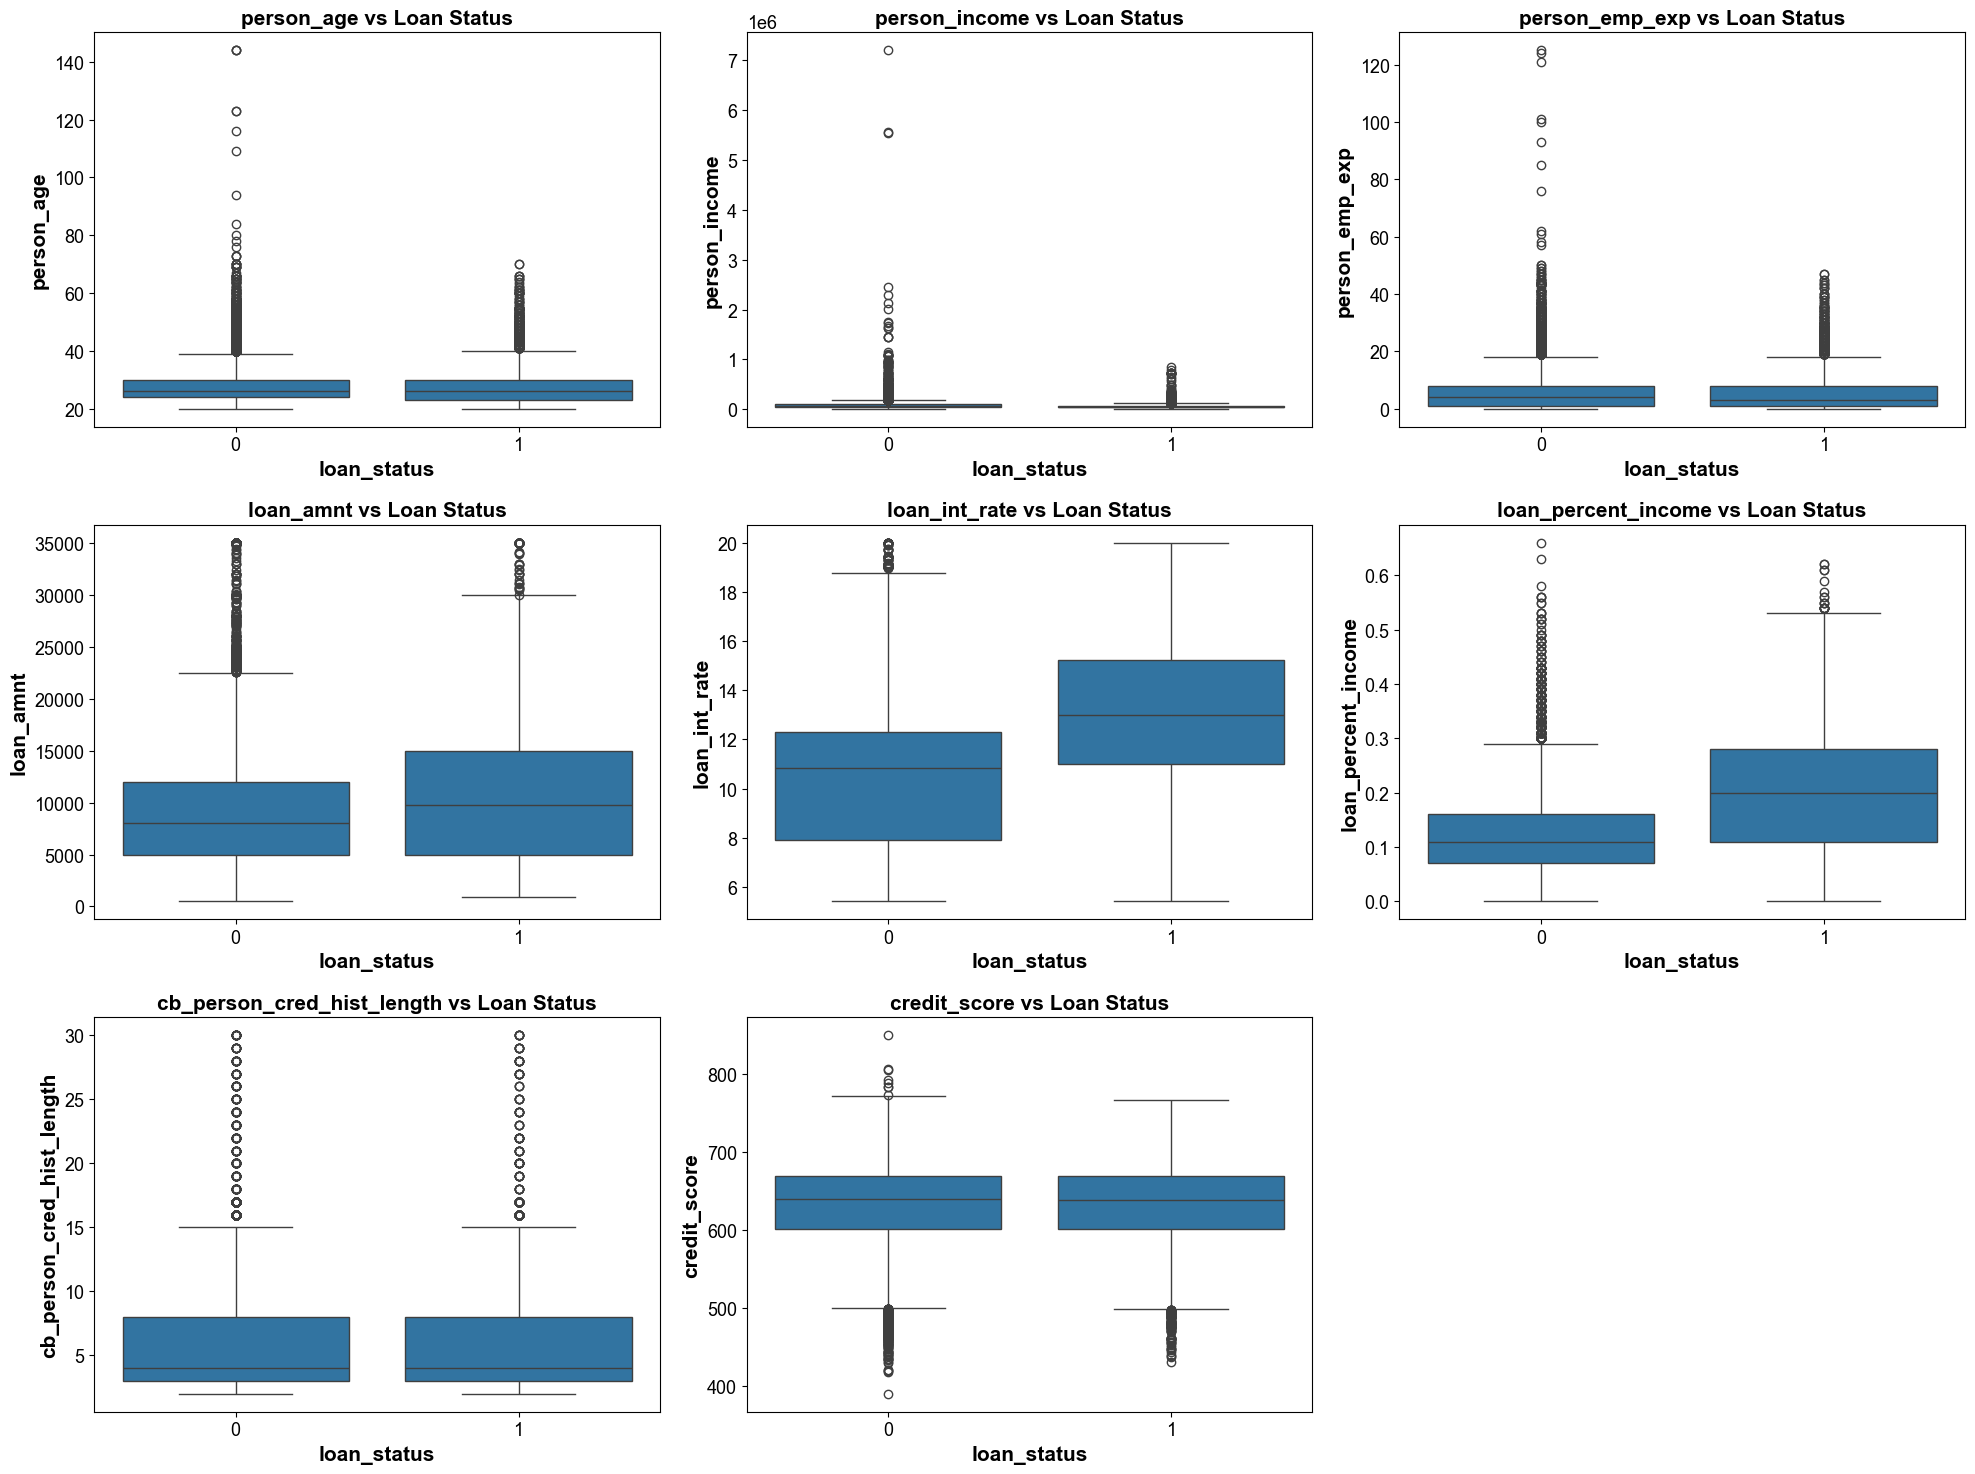

In [29]:
# Plotting boxplot with columns vs loan status
import math
ncols = 3
rows = math.ceil(len(num_cols) / ncols)
fig, axes = plt.subplots(nrows=rows, ncols=ncols,figsize=(20, 5 * rows))
axes = axes.flatten()  # easy indexing
for i, col in enumerate(num_cols):
    sns.boxplot(x='loan_status', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Loan Status")
    axes[i].set_xlabel('loan_status', )
    axes[i].set_ylabel(col)
# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

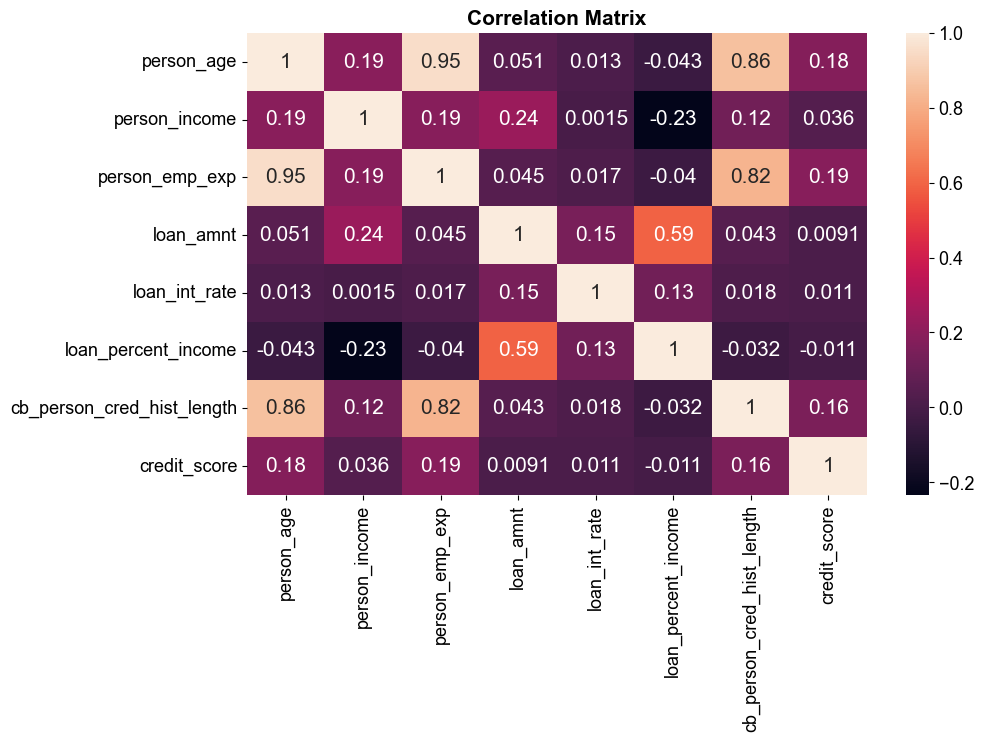

In [30]:
# Heatmap plot for correlation among features.
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


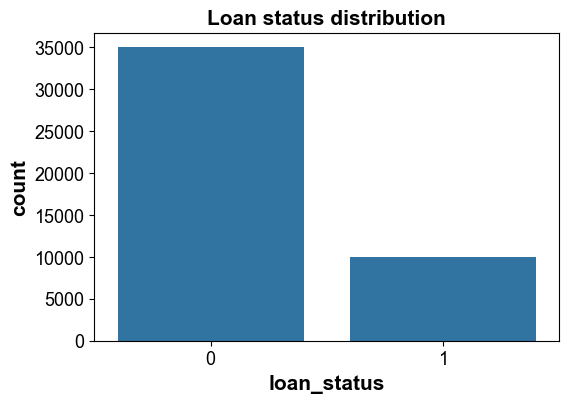

In [31]:
# Loan status distribution
plt.figure(figsize=(6,4))
sns.countplot(x="loan_status",data=df)
plt.title("Loan status distribution")
plt.xlabel('loan_status')
plt.ylabel('count')
plt.show()

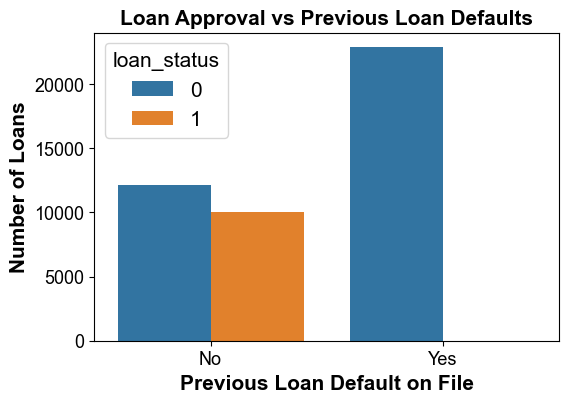

In [32]:
# Count plot for previous loan defaults on file vs loan approval status.
plt.figure(figsize=(6, 4))
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status',data=df)
plt.title("Loan Approval vs Previous Loan Defaults")
plt.xlabel("Previous Loan Default on File")
plt.ylabel("Number of Loans")
plt.show()

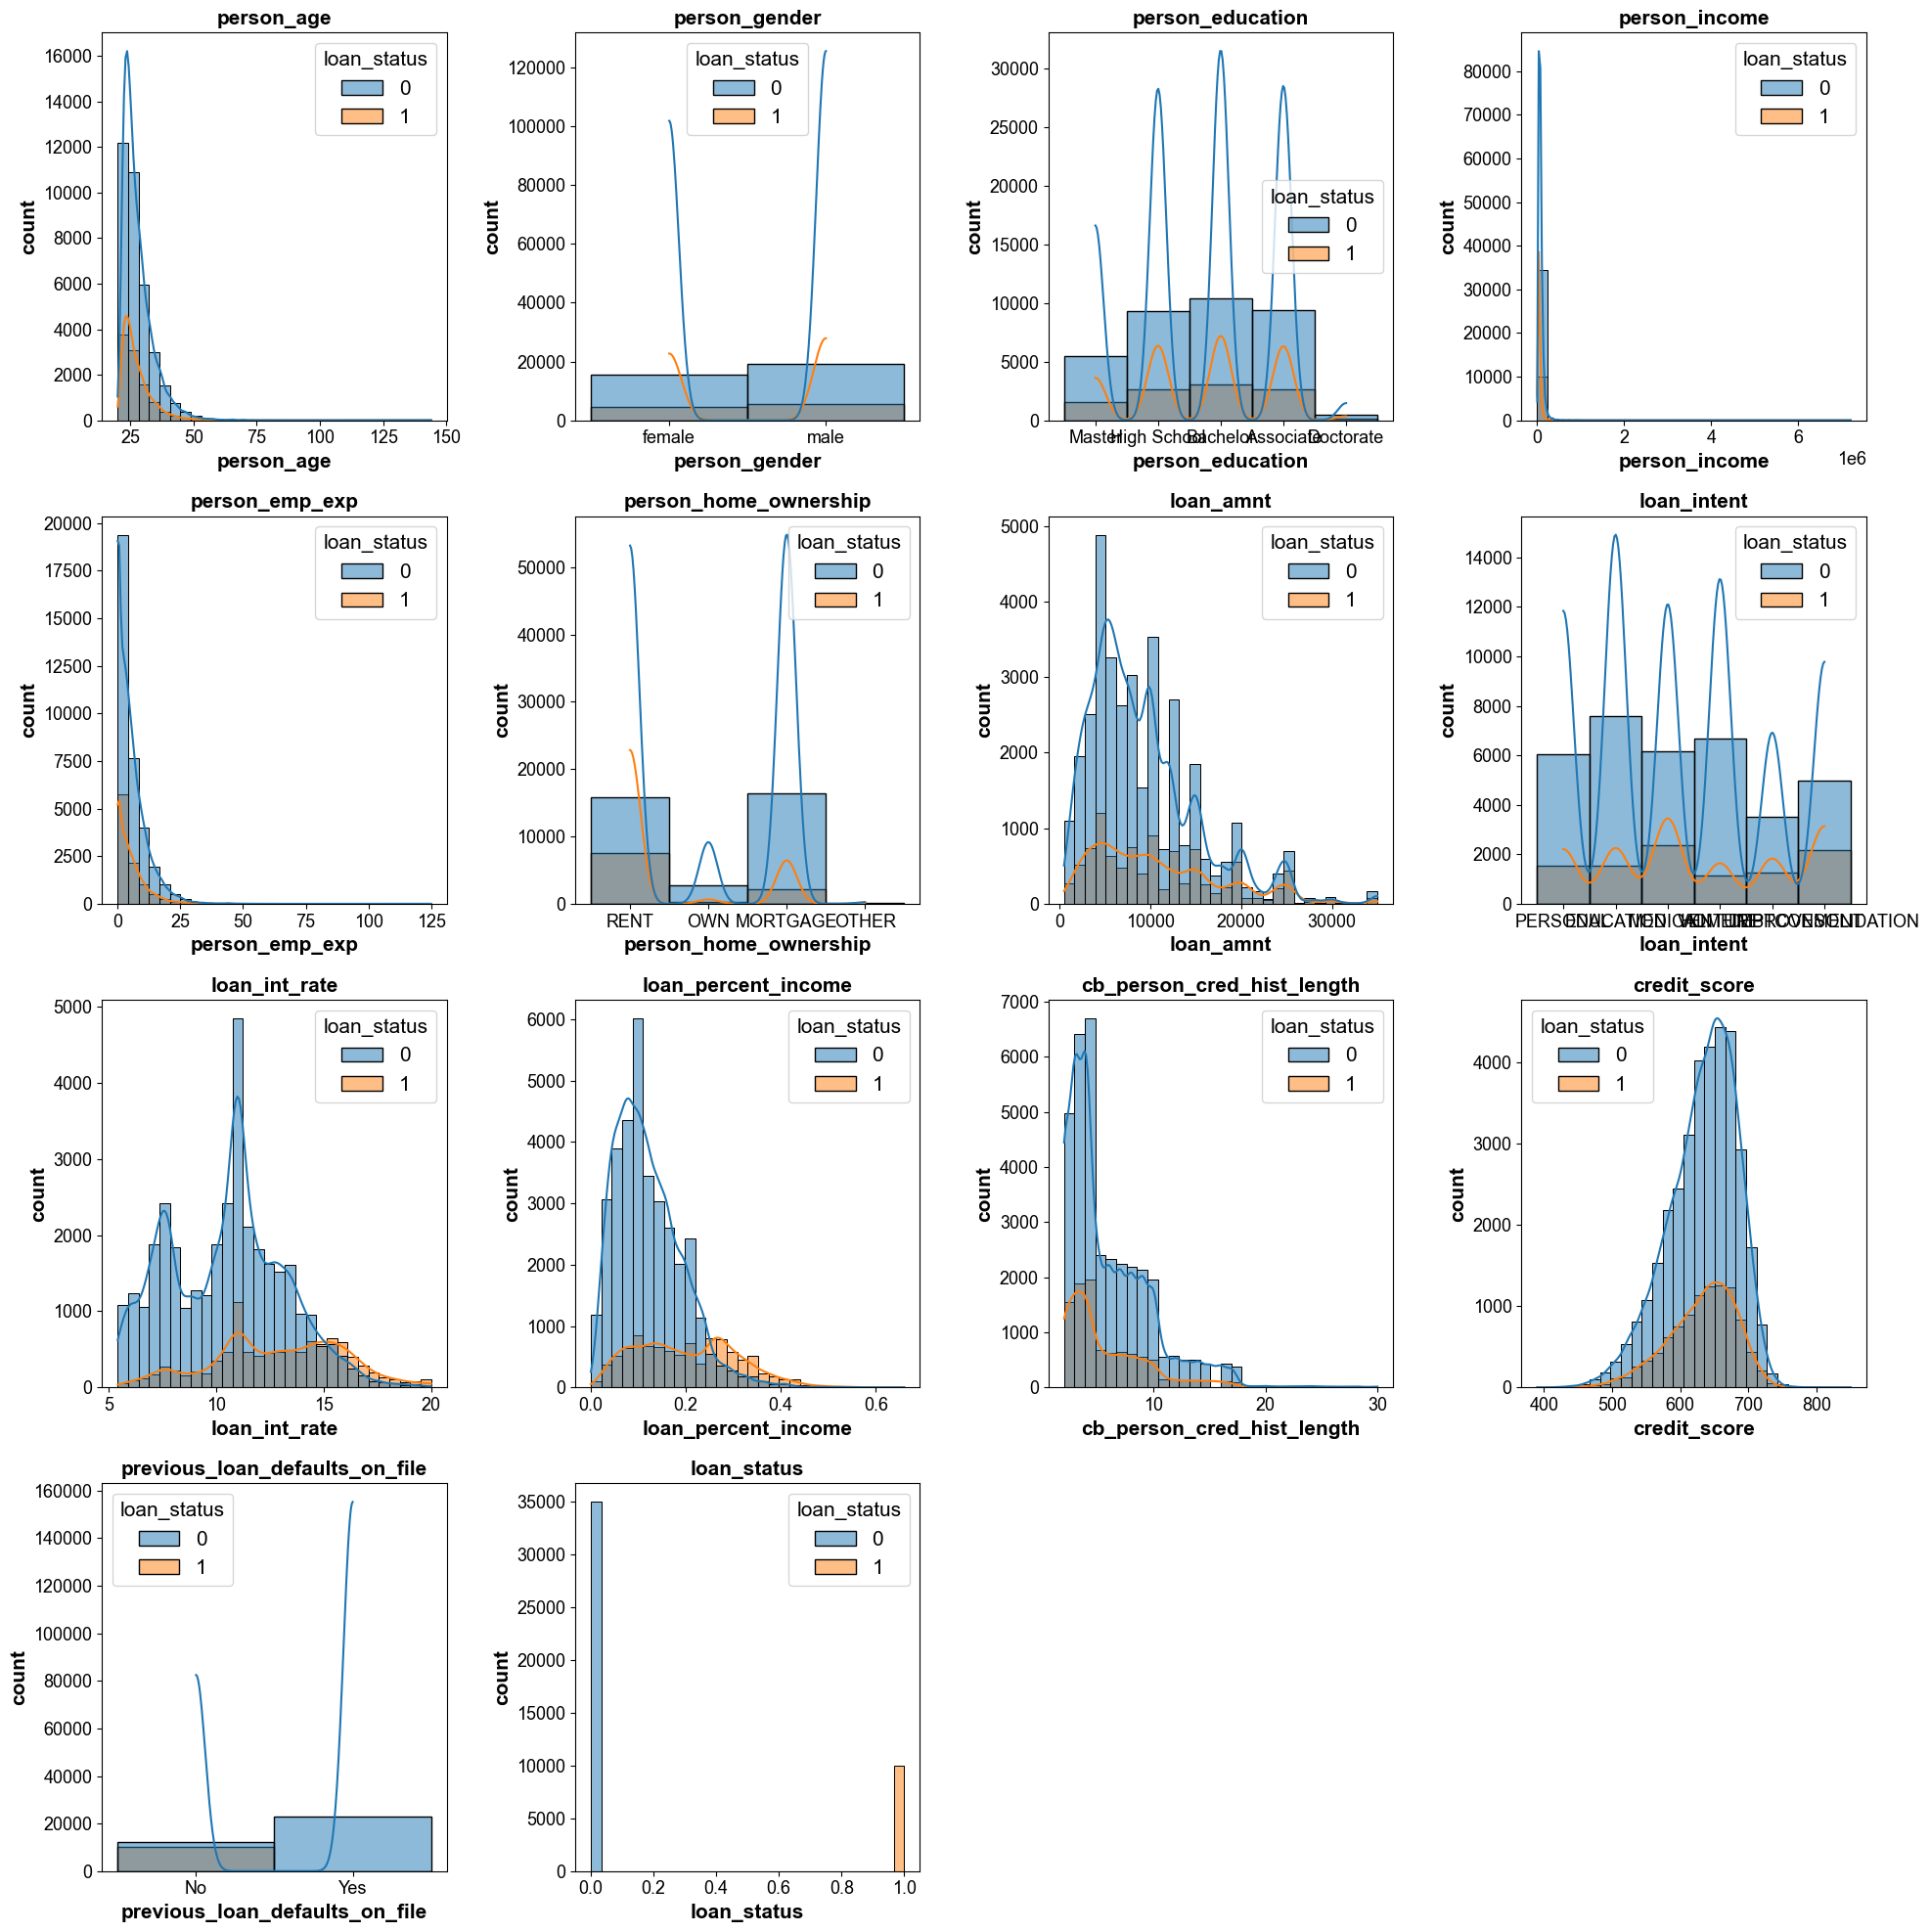

In [126]:
# histogram plot for all columns.
cols = df.columns
n_cols = 4
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # make indexing easy
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='loan_status', bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')
# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [35]:
# Separating and storing numerical and categorical column features.
X_num = df.select_dtypes(include=['int64','float64'])  # numerical
X_cat = df.select_dtypes(include=['object','category'])  # categorical
y = df['loan_status']

In [36]:
# Scaling and Fit transform
X_num_scaled = StandardScaler().fit_transform(X_num)
X_num_scaled

array([[-0.95353824, -0.10408961, -0.89228413, ..., -0.73910854,
        -1.41981408,  1.87082869],
       [-1.11896309, -0.84600467, -0.89228413, ..., -0.99686317,
        -2.5499748 , -0.53452248],
       [-0.45726369, -0.84406489, -0.3975175 , ..., -0.73910854,
         0.04741211,  1.87082869],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ...,  1.06517387,
         0.70171569,  1.87082869],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  0.03415535,
        -0.5672367 ,  1.87082869],
       [-0.62268854, -0.35699428, -0.72736192, ..., -0.73910854,
        -0.09137955,  1.87082869]], shape=(45000, 9))

In [37]:
# One Hot Encoder for categorical features.
from sklearn.preprocessing import OneHotEncoder
X_cat_encoded = OneHotEncoder(handle_unknown="ignore").fit_transform(X_cat).toarray()
X_cat_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], shape=(45000, 19))

In [38]:
import numpy as np
X_processed = np.hstack([X_num_scaled, X_cat_encoded])
X_processed

array([[-0.95353824, -0.10408961, -0.89228413, ...,  0.        ,
         1.        ,  0.        ],
       [-1.11896309, -0.84600467, -0.89228413, ...,  0.        ,
         0.        ,  1.        ],
       [-0.45726369, -0.84406489, -0.3975175 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62268854, -0.35699428, -0.72736192, ...,  0.        ,
         1.        ,  0.        ]], shape=(45000, 28))

In [39]:
# Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Model Training 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
# Performance Metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


### Dataset 2 - Predicting Diabetes

In [42]:
# Loading the dataset 2 - Predicting Diabetes
df1=pd.read_csv('diabetes.csv')
print(df1.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [43]:
# First five rows of the dataset
df1.head(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [44]:
# Dataset Columns details
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [45]:
# Statistics summary of the numerical columns
df1.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [46]:
# List of columns in the dataset
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [47]:
# Number of rows and columns of the Dataset 
df1.shape

(100000, 9)

In [48]:
# Checking if any null / missing values present
df1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

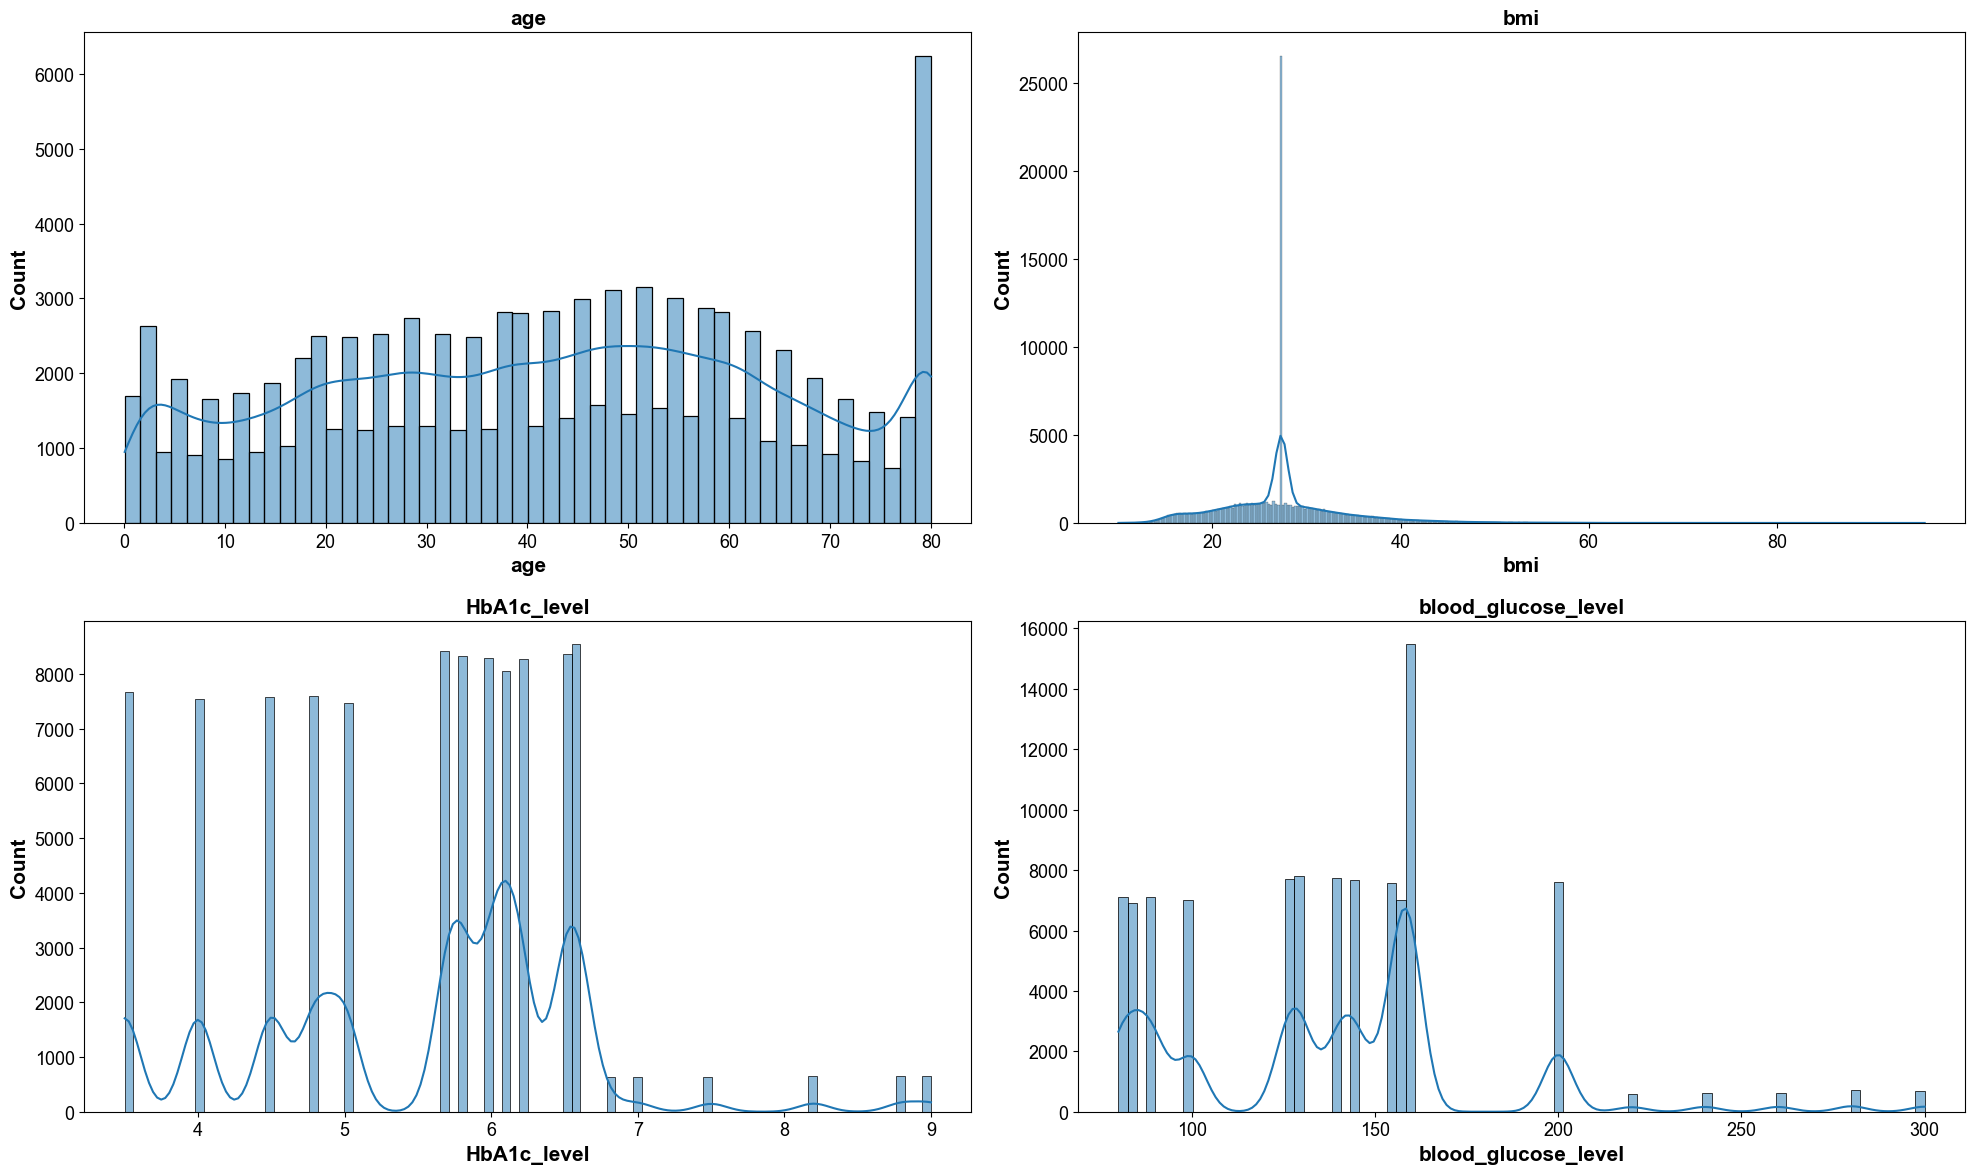

In [52]:
# Histogram plot for numerical features.
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
ncols=2
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,6*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(df1[col],kde=True,ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

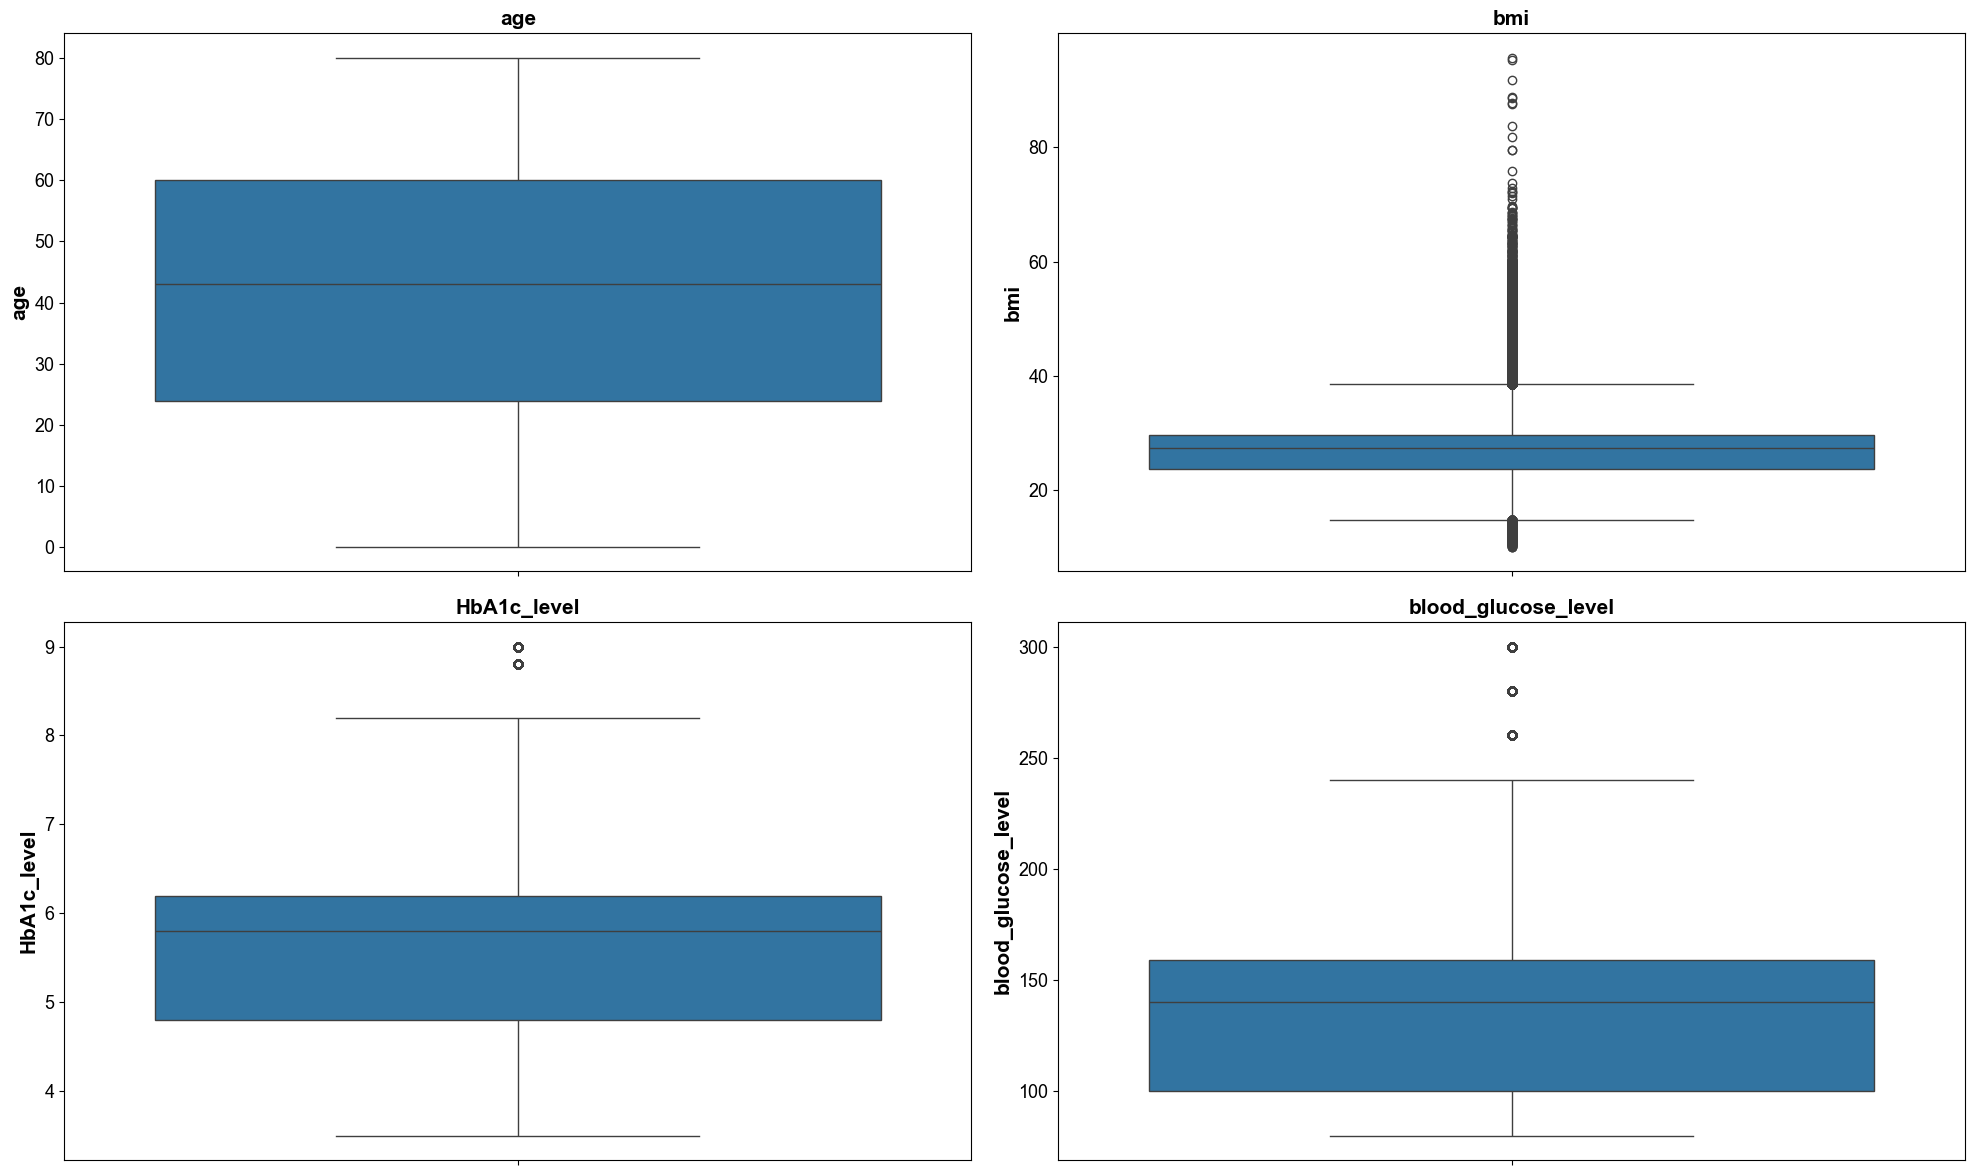

In [53]:
# Boxplot for numerical features
ncols=2
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,6*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(df1[col],ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

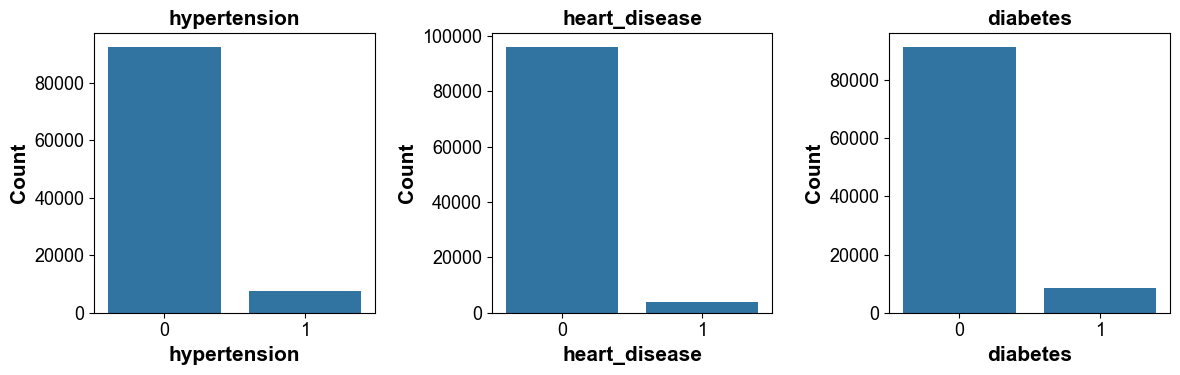

In [54]:
# Count plot for categorical features.
cat_cols = ['hypertension', 'heart_disease', 'diabetes']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4)) 
axes = axes.flatten()  
for i, col in enumerate(cat_cols):
    sns.countplot(x=df1[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

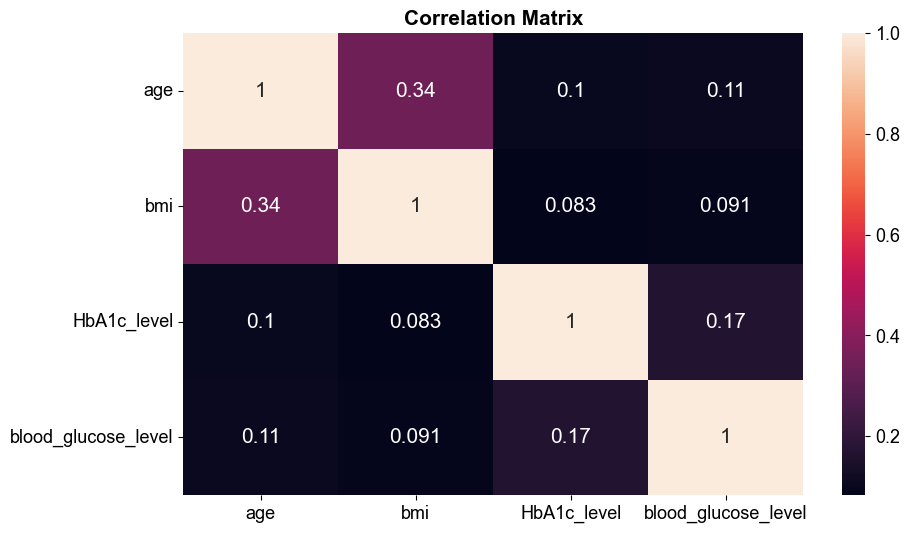

In [55]:
# Heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(df1[num_cols].corr(), annot=True)
plt.title(
    "Correlation Matrix",
    fontsize=15,
    fontweight='bold',
    fontname='Arial'
)
plt.show()

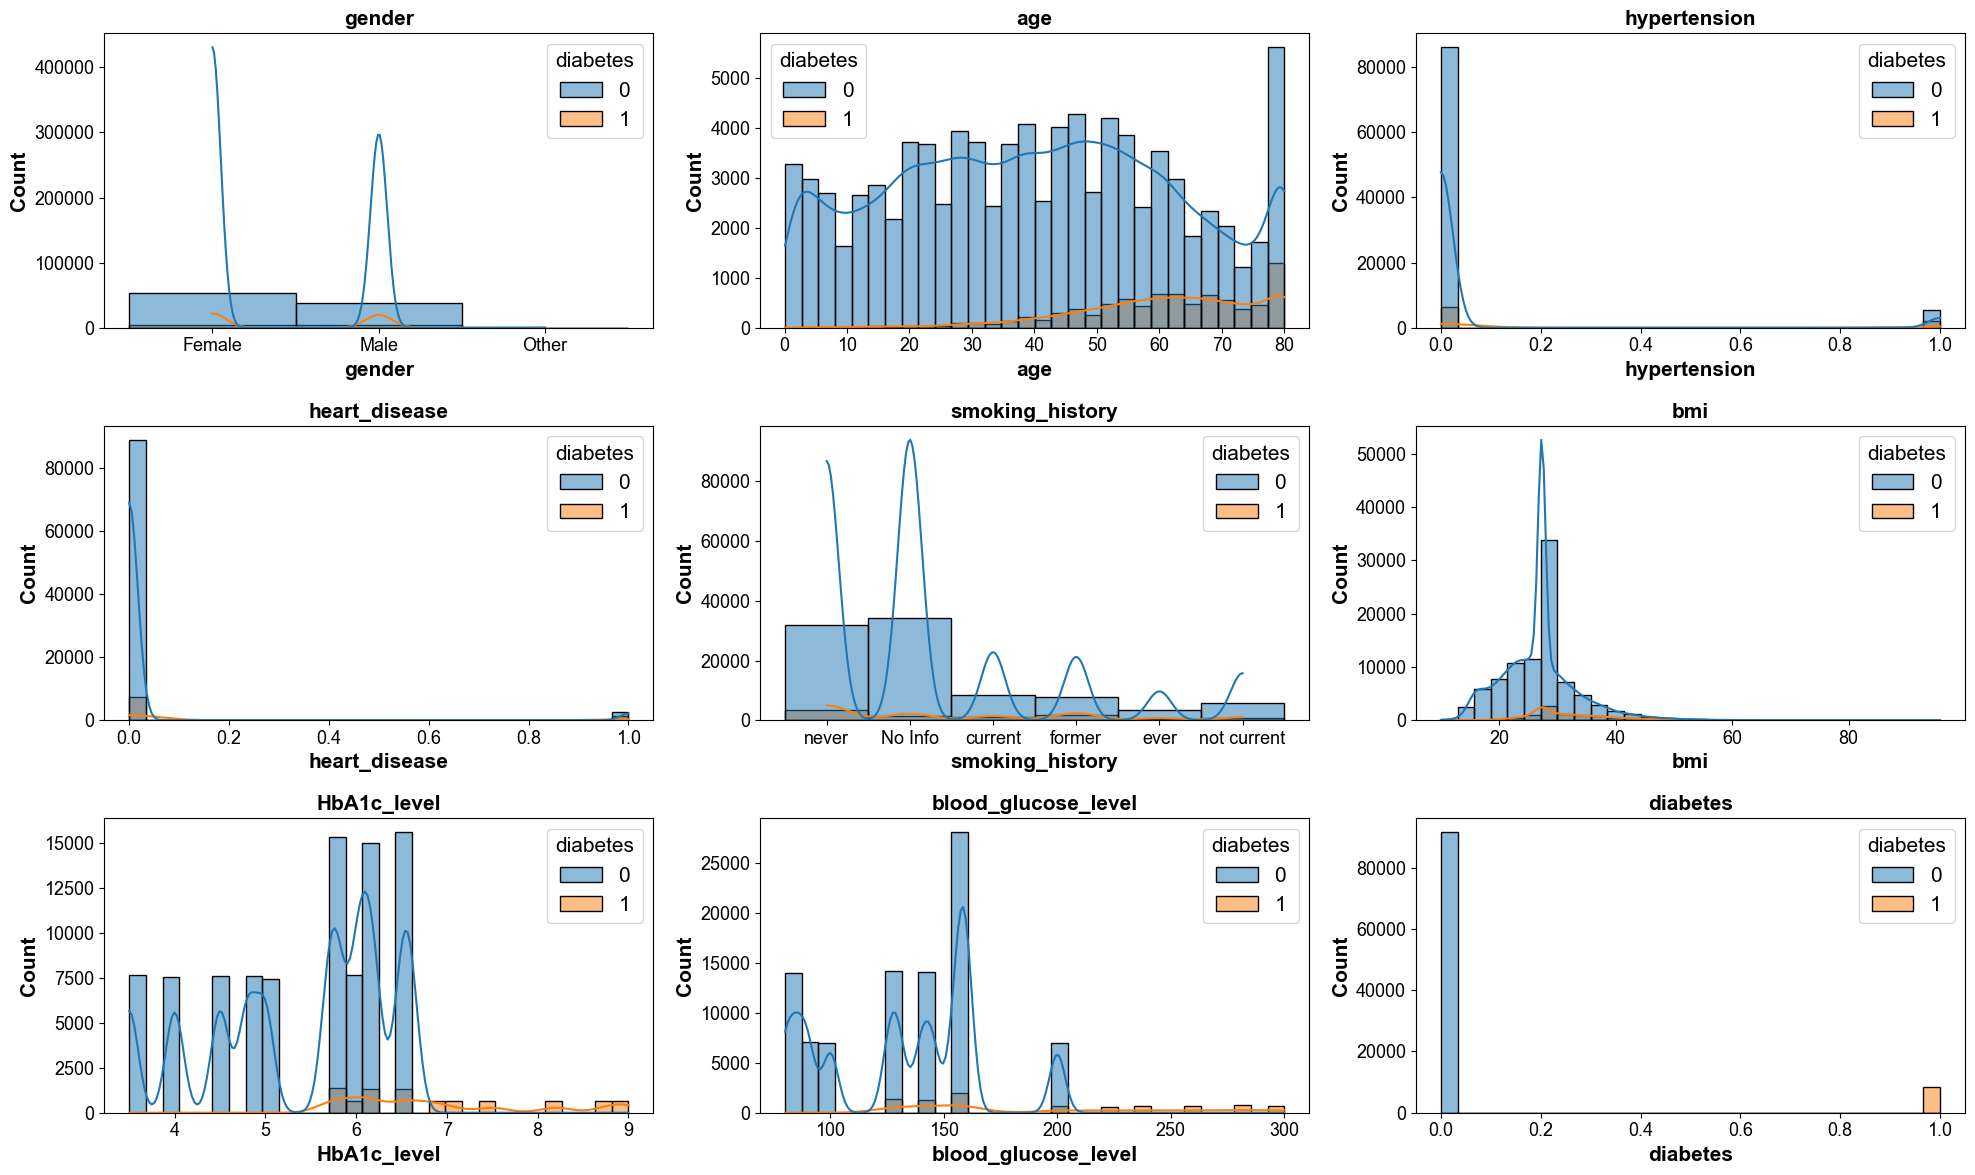

In [56]:
# Histogram plot
cols = df1.columns
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # make indexing easy
for i, col in enumerate(cols):
    sns.histplot(data=df1, x=col, hue='diabetes', bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [57]:
X_num = df1.select_dtypes(include=['int64','float64'])  # numerical
X_cat = df1.select_dtypes(include=['object','category'])  # categorical
y = df1['diabetes']


In [58]:
X_num_scaled = StandardScaler().fit_transform(X_num)
print(X_num_scaled)

[[ 1.69270354 -0.28443945  4.93637859 ...  1.00170572  0.04770422
  -0.30478874]
 [ 0.53800643 -0.28443945 -0.20257766 ...  1.00170572 -1.42620999
  -0.30478874]
 [-0.61669069 -0.28443945 -0.20257766 ...  0.16110802  0.48987848
  -0.30478874]
 ...
 [ 1.07094356 -0.28443945 -0.20257766 ...  0.16110802  0.41618277
  -0.30478874]
 [-0.7943364  -0.28443945 -0.20257766 ... -1.42668764 -0.93490525
  -0.30478874]
 [ 0.67124071 -0.28443945 -0.20257766 ...  1.00170572 -1.18055762
  -0.30478874]]


In [59]:
from sklearn.preprocessing import OneHotEncoder
X_cat_encoded = OneHotEncoder(handle_unknown="ignore").fit_transform(X_cat).toarray()
X_cat_encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(100000, 9))

In [60]:
import numpy as np
X_processed = np.hstack([X_num_scaled, X_cat_encoded])
X_processed

array([[ 1.69270354, -0.28443945,  4.93637859, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.53800643, -0.28443945, -0.20257766, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61669069, -0.28443945, -0.20257766, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  1.        ,
         0.        ,  0.        ],
       [-0.7943364 , -0.28443945, -0.20257766, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67124071, -0.28443945, -0.20257766, ...,  0.        ,
         0.        ,  0.        ]], shape=(100000, 16))

In [67]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [127]:
# Model Training
from sklearn.linear_model import Ridge

model = Ridge(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [69]:
# Performance Metric
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


### Dataset 3 - Classification of Email spam and MNIST data

In [71]:
# Loading the dataset 3 - Classification of Email spam and MNIST data
df = pd.read_csv("spambase_csv_Kaggle.csv")
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.000   
1             0.00            0.94  ...           0.00          0.132   
2             0.64            0.25  ...           0.01          0.143   
3             0.31            0.63  ...           0.00          0.137   
4             0.31            0.63  ...           0.00          0.135   

   char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
0            0.0          0.778          0.000          0.000   
1            0.0          0.372          0.180          0.048   
2            0.0          0.276          0.184          0.010   
3            0.0          0.137          0.000          0.000   
4            0.0          0.135          0.000          0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  class  
0                       278      1  
1                      1028      1  
2                      2259      1  
3                       191      1  
4                       191      1  

[5 rows x 58 columns]

In [72]:
# First five rows of the dataset
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.000   
1             0.00            0.94  ...           0.00          0.132   
2             0.64            0.25  ...           0.01          0.143   
3             0.31            0.63  ...           0.00          0.137   
4             0.31            0.63  ...           0.00          0.135   

   char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
0            0.0          0.778          0.000          0.000   
1            0.0          0.372          0.180          0.048   
2            0.0          0.276          0.184          0.010   
3            0.0          0.137          0.000          0.000   
4            0.0          0.135          0.000          0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  class  
0                       278      1  
1                      1028      1  
2                      2259      1  
3                       191      1  
4                       191      1  

[5 rows x 58 columns]

In [73]:
# Dataset Columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [74]:
# Statistics summary of the numerical columns
df.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.380000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
count      4601.000000     4601.000000  ...    4601.000000    4601.000000   
mean          0.090067        0.239413  ...       0.038575       0.139030   
std           0.278616        0.644755  ...       0.243471       0.270355   
min           0.000000        0.000000  ...       0.000000       0.000000   
25%           0.000000        0.000000  ...       0.000000       0.000000   
50%           0.000000        0.000000  ...       0.000000       0.065000   
75%           0.000000        0.160000  ...       0.000000       0.188000   
max           5.260000       18.180000  ...       4.385000       9.752000   

       char_freq_%5B  char_freq_%21  char_freq_%24  char_freq_%23  \
count    4601.000000    4601.000000    4601.000000    4601.000000   
mean        0.016976       0.269071       0.075811       0.044238   
std         0.109394       0.815672       0.245882       0.429342   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.315000       0.052000       0.000000   
max         4.081000      32.478000       6.003000      19.829000   

       capital_run_length_average  capital_run_length_longest  \
count                 4601.000000                 4601.000000   
mean                     5.191515                   52.172789   
std                     31.729449                  194.891310   
min                      1.000000                    1.000000   
25%                      1.588000                    6.000000   
50%                      2.276000                   15.000000   
75%                      3.706000                   43.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total        class  
count               4601.000000  4601.000000  
mean                 283.289285     0.394045  
std                  606.347851     0.488698  
min                    1.000000     0.000000  
25%                   35.000000     0.000000  
50%                   95.000000     0.000000  
75%                  266.000000     1.000000  
max                15841.000000     1.000000  

[8 rows x 58 columns]

In [75]:
# List of columns in the dataset
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [76]:
# Number of rows and columns of the Dataset 
df.shape

(4601, 58)

In [78]:
# Checking if any null / missing values present
any(df.isna().sum())

False

In [79]:
# Checking if any duplicate rows are found.
print("Duplicates in data: ", any(df.duplicated()))

Duplicates in data:  True


In [81]:
# Remove duplicates rows.
df = df.drop_duplicates()
print("Duplicates in data: ", any(df.duplicated()))

Duplicates in data:  False


In [82]:
# Checking the missing and null values...for train data
print("Any Missing Values: ", any(df.isnull().sum()))

Any Missing Values:  False


In [83]:
# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

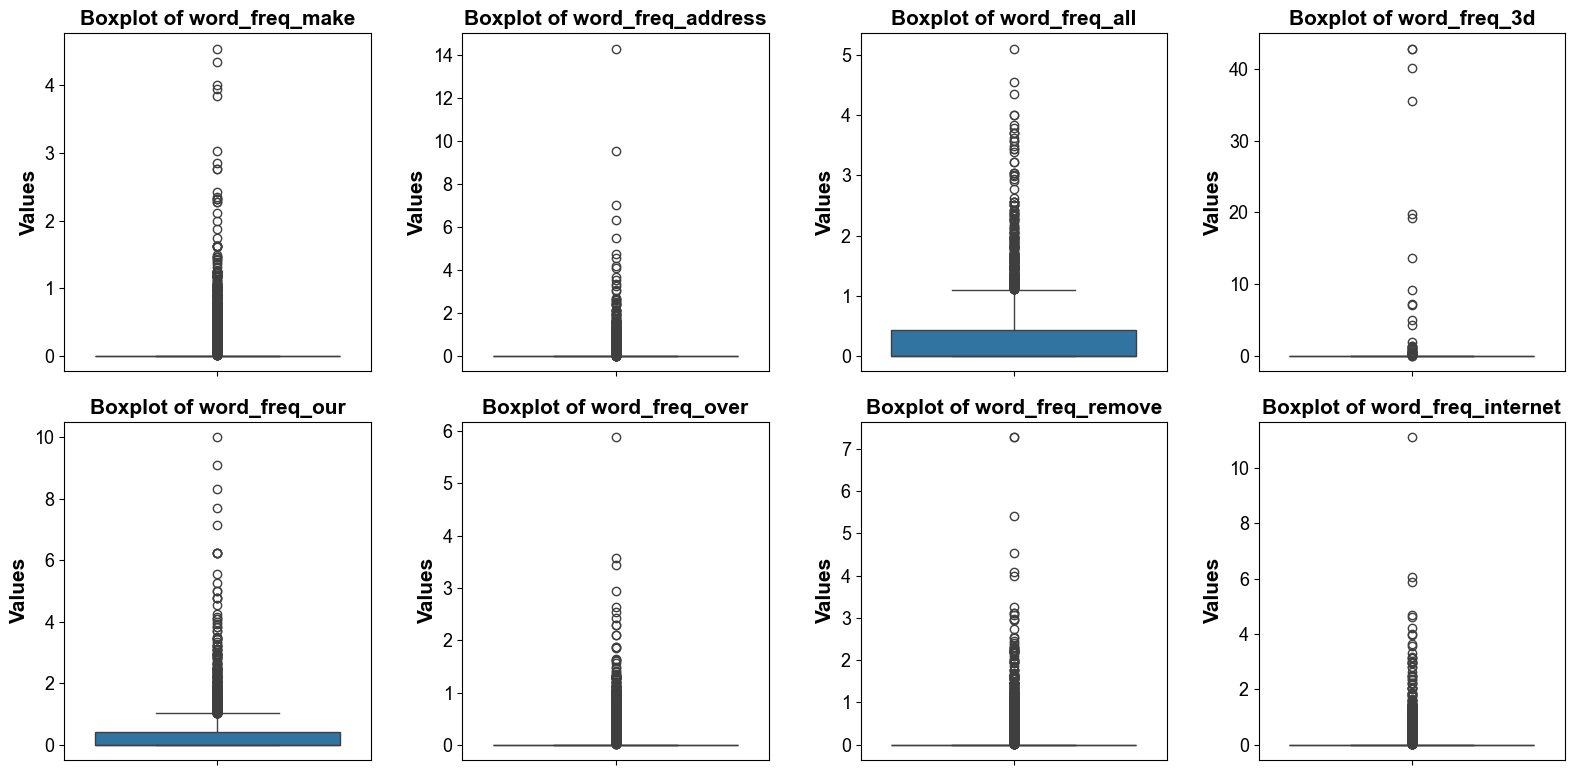

In [84]:
# Boxplot for outliers.
# Select only 8 features
selected_features = X.columns[:8]
X_subset = X[selected_features]
n_cols = 4   # 4 plots per row
n_rows = 2   # 2 rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(X_subset.columns):
    sns.boxplot(y=X_subset[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Values')
# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [85]:
# Handling outliers by using capping.
cols = df.drop(columns='class', axis = 1)
for col in cols:
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)
    df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit, df[col]))

In [86]:
# Separate features (X) and target (y) again after handling outliers.
X = df.drop('class', axis=1)
y = df['class']

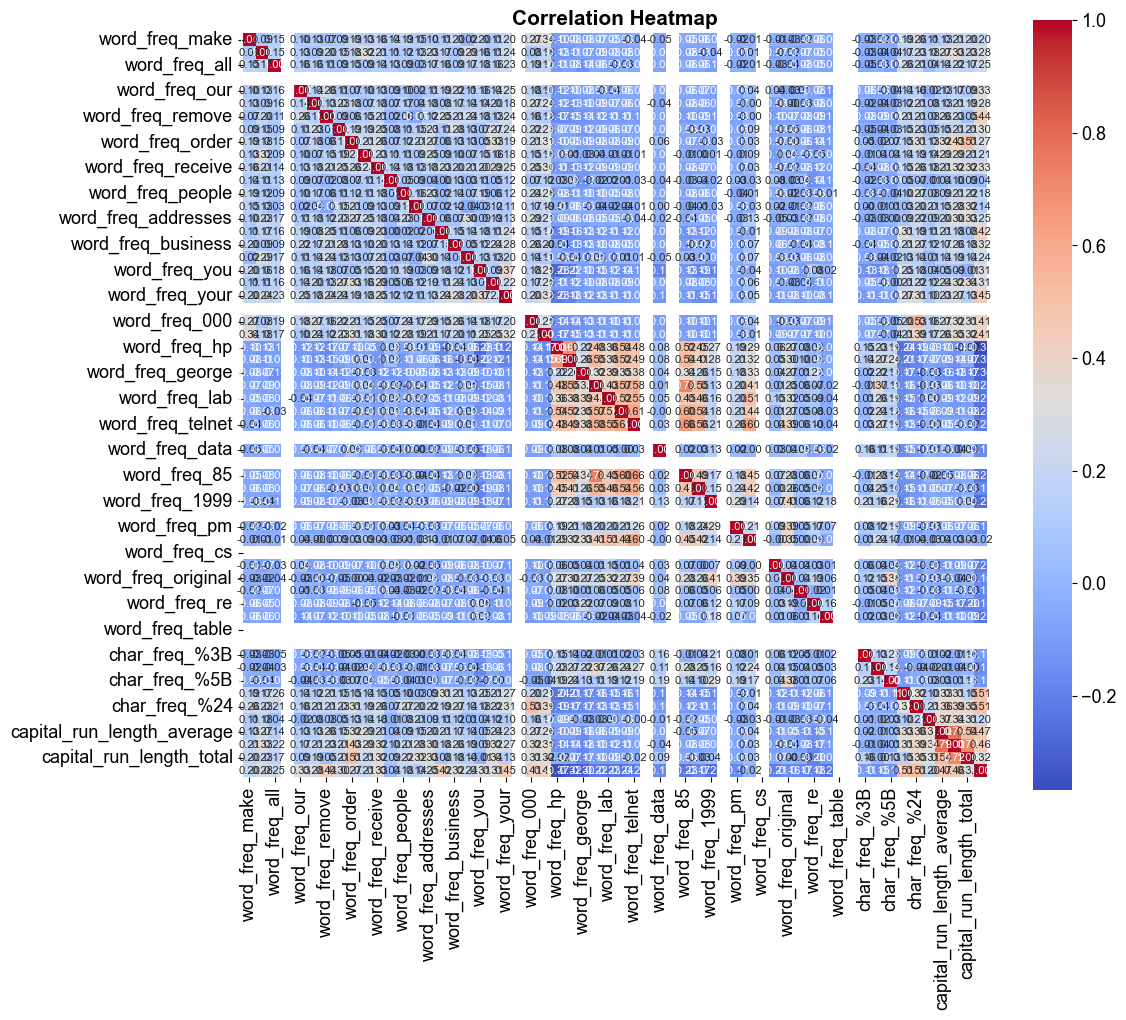

In [88]:
# Correlation analysis
corr = df.corr()
# Heatmap plot for correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

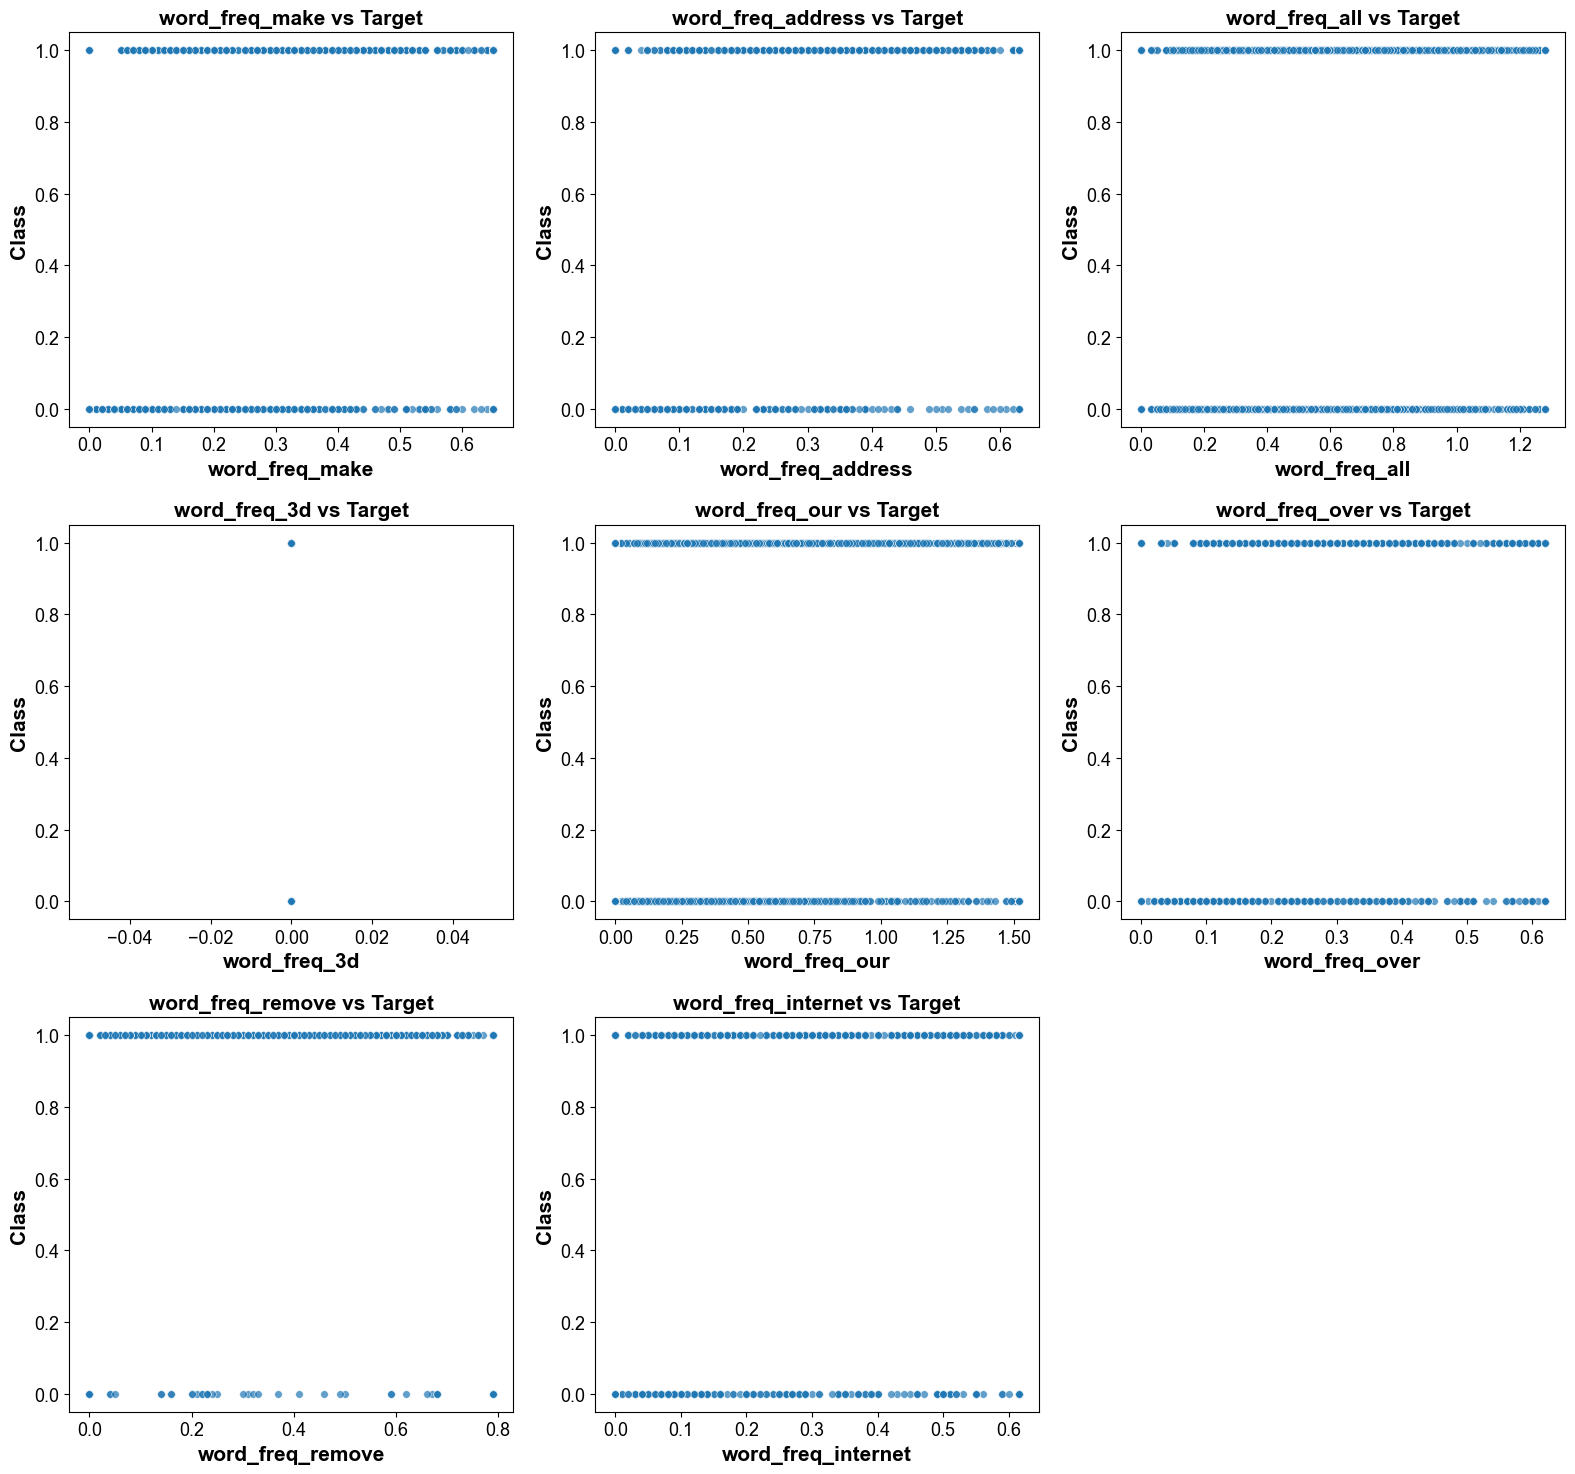

In [90]:
# Feature vs. target scatter plots
# Select numerical features (exclude target if numeric)
num_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = num_features.drop('class', errors='ignore')
# Select only first 8 features
selected_features = num_features[:8]
n_cols = 3
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 15))
axes = axes.flatten()
for i, col in enumerate(selected_features):
    sns.scatterplot(x=df[col], y=df["class"], ax=axes[i], s=30, alpha=0.7)
    axes[i].set_title(f"{col} vs Target")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Class")
# Remove unused subplots (safe)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [91]:
# Checking the class balance 
print("Class 1 has : ", df[df['class'] == 1].shape)
print("Class 0 has : ", df[df['class'] == 0].shape)

Class 1 has :  (1679, 58)
Class 0 has :  (2531, 58)


In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [93]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Model Training
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

In [95]:
# Logistic Regression Performance Metric
print("Logistic Regression Performance Metric")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


Logistic Regression Performance Metric
Accuracy:  0.9394299287410927
Recall:  0.9107142857142857
Precision:  0.9357798165137615
F1 Score:  0.9230769230769231


### Dataset 4 -  Iris Dataset

In [96]:
import pandas as pd

# Correct column names (including Id temporarily)
column_names = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read CSV:
# header=None → because file structure is messy
# skiprows=[1] → skip the second header row
df = pd.read_csv("iris.csv", header=None, names=column_names, skiprows=[1])

# Drop the Id column (not needed)
df.drop(columns=['id'], inplace=True)

# Convert numeric columns explicitly
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# 2. Inspect the data
print("First 5 rows (now correct):")
display(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())


First 5 rows (now correct):


sepal_length  sepal_width  petal_length  petal_width      species
0           NaN          NaN           NaN          NaN      Species
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:


sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [97]:
df = df.iloc[1:].reset_index(drop=True)

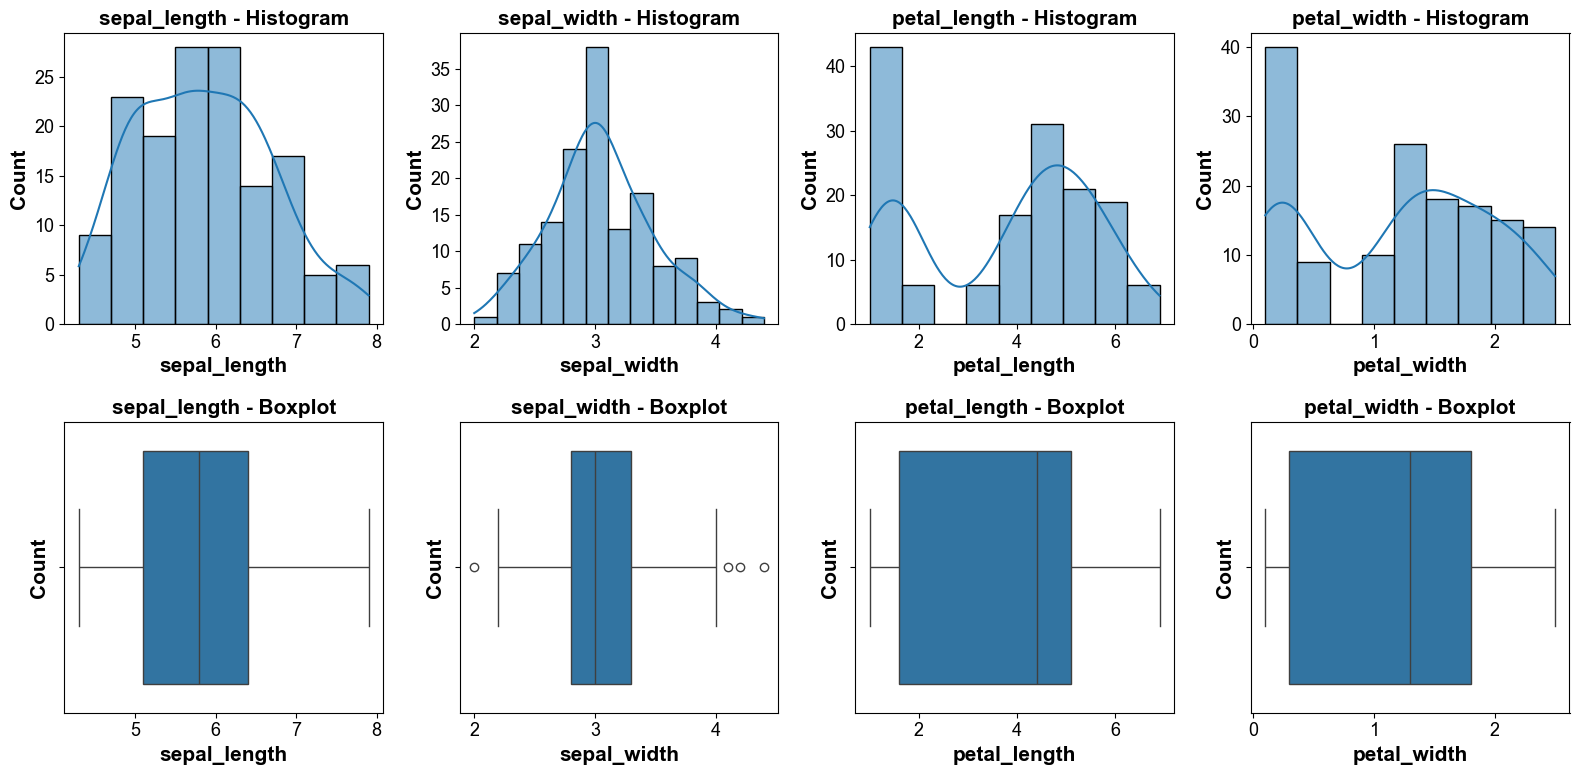

In [101]:
# Histogram \& BoxPlot
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
ncols = 5
nrows = 2 * math.ceil(len(num_cols) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} - Histogram")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    sns.boxplot(x=df[col], ax=axes[i + ncols])
    axes[i + ncols].set_title(f"{col} - Boxplot")
    axes[i + ncols].set_xlabel(col)
    axes[i + ncols].set_ylabel('Count')
# Remove unused subplots
for j in range(len(num_cols), ncols):
    fig.delaxes(axes[j])
    fig.delaxes(axes[j + ncols])
plt.tight_layout()
plt.show()

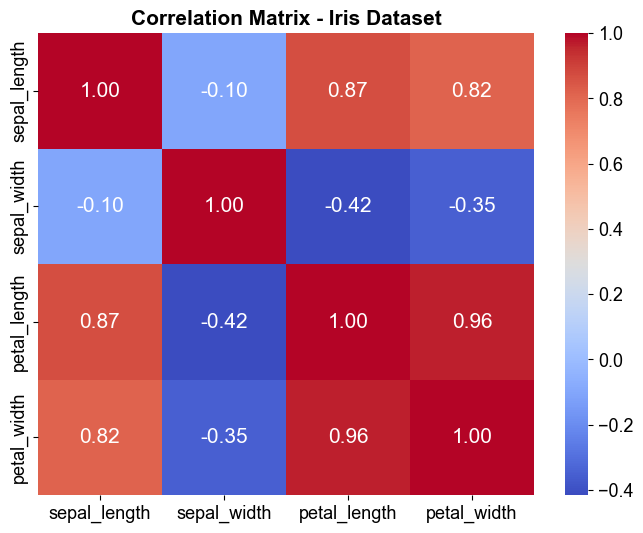

In [102]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix - Iris Dataset")
plt.show()

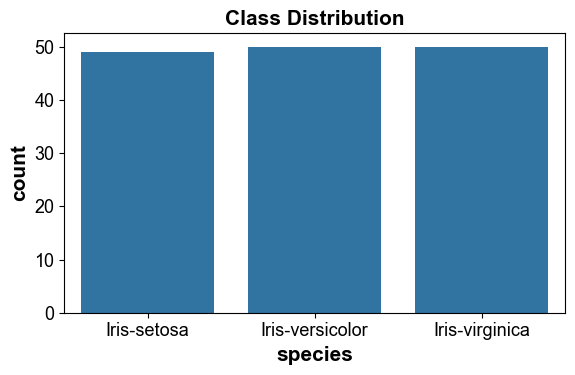

In [103]:
# Class Distribution
fig, ax = plt.subplots(1, 1, figsize=(6,4))
# Count plot
sns.countplot(x='species', data=df, ax=ax)
ax.set_title("Class Distribution")
ax.set_xlabel('species')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

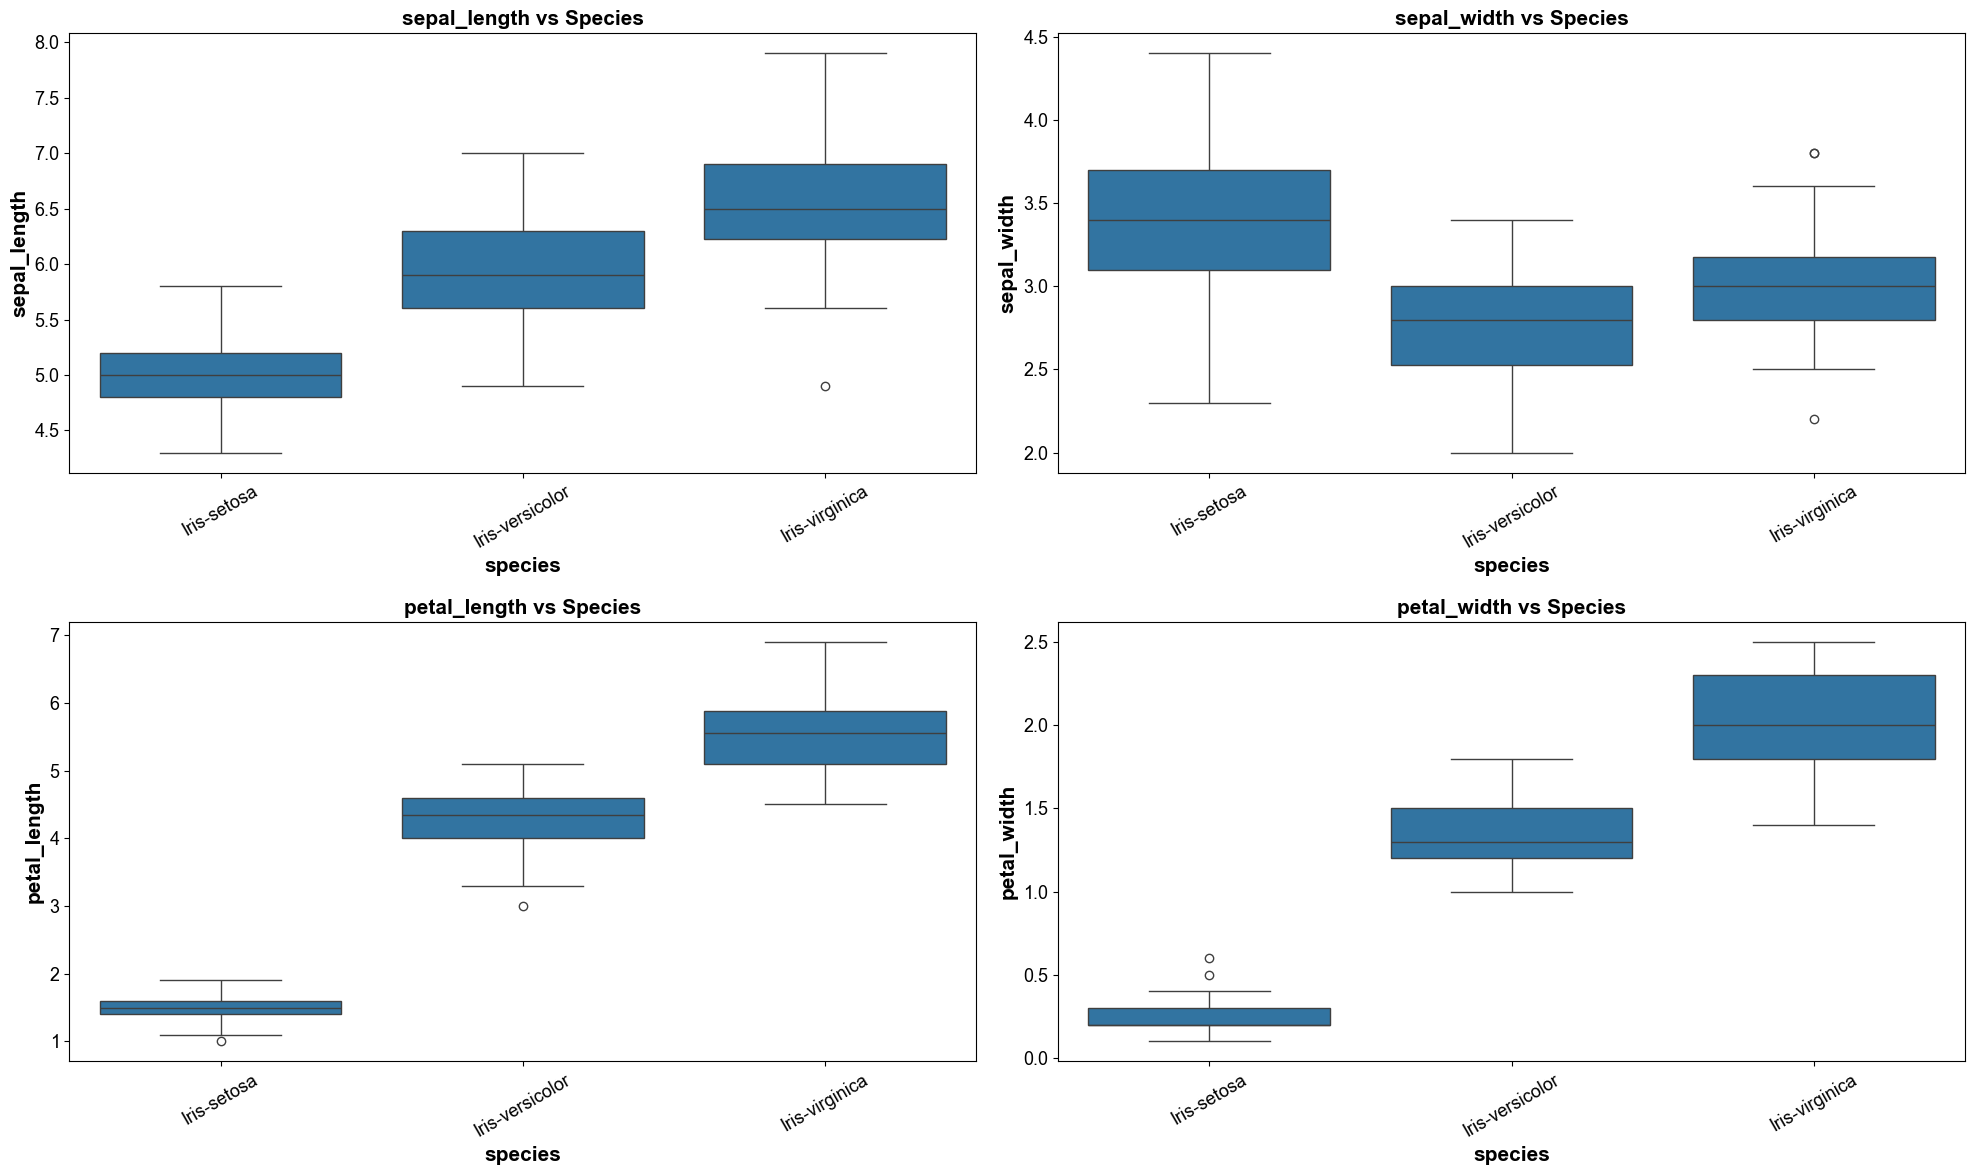

In [105]:
# BoxPlot
ncols = 2
nrows = math.ceil(len(num_cols) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6*nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x='species', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Species")
    axes[i].tick_params(axis='x', rotation=30)
# Remove unused subplots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [106]:
# Feature - target split
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [107]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [108]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [110]:
# Model Training
model = LogisticRegression(
    max_iter=1000
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
# Performance Metric
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9333333333333333

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### Dataset 5 -  Handwritten character recognition

(3411, 2)
label
0        55
1        55
2        55
4        55
3        55
         ..
v        55
y        55
x        55
z        55
label     1
Name: count, Length: 63, dtype: int64


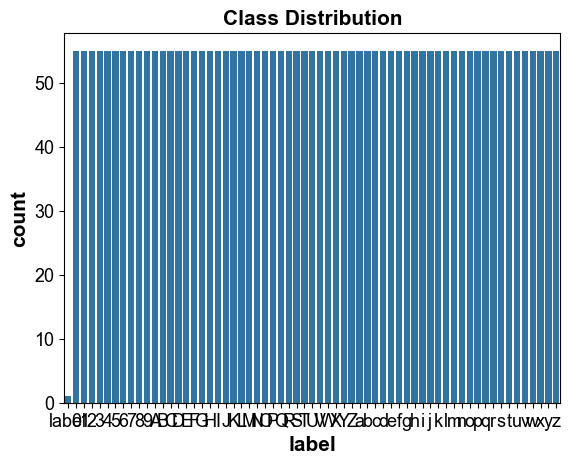

In [112]:
df = pd.read_csv("english.csv", names=['image_path','label'])

print(df.shape)
print(df['label'].value_counts())

sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.show()

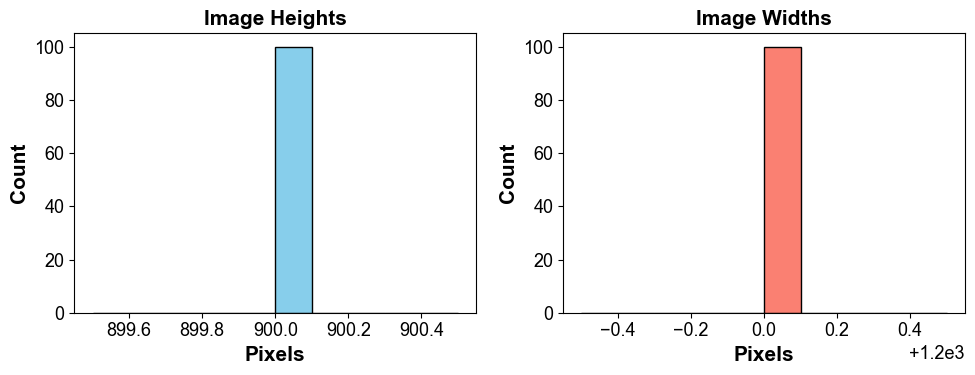

In [116]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_folder = r"C:\Users\SSN\Desktop\College_Sem\6th_Sem_Materials\ML Lab\Experiment_1\Img"

heights, widths = [], []

# Skip first row (invalid 'image') and process remaining
for path in df['image_path'][1:101]:  # first 100 valid images
    img_file = os.path.basename(path)  # get just the filename
    img_path = os.path.join(img_folder, img_file)

    if not os.path.exists(img_path):
        print("Image not found:", img_path)
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to read:", img_path)
        continue

    h, w = img.shape
    heights.append(h)
    widths.append(w)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(heights, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Image Heights")
axes[0].set_xlabel("Pixels")
axes[0].set_ylabel("Count")
axes[1].hist(widths, bins=10, color='salmon', edgecolor='black')
axes[1].set_title("Image Widths")
axes[1].set_xlabel("Pixels")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


In [117]:
print(df['image_path'][:10])


0                 image
1    Img/img001-001.png
2    Img/img001-002.png
3    Img/img001-003.png
4    Img/img001-004.png
5    Img/img001-005.png
6    Img/img001-006.png
7    Img/img001-007.png
8    Img/img001-008.png
9    Img/img001-009.png
Name: image_path, dtype: object


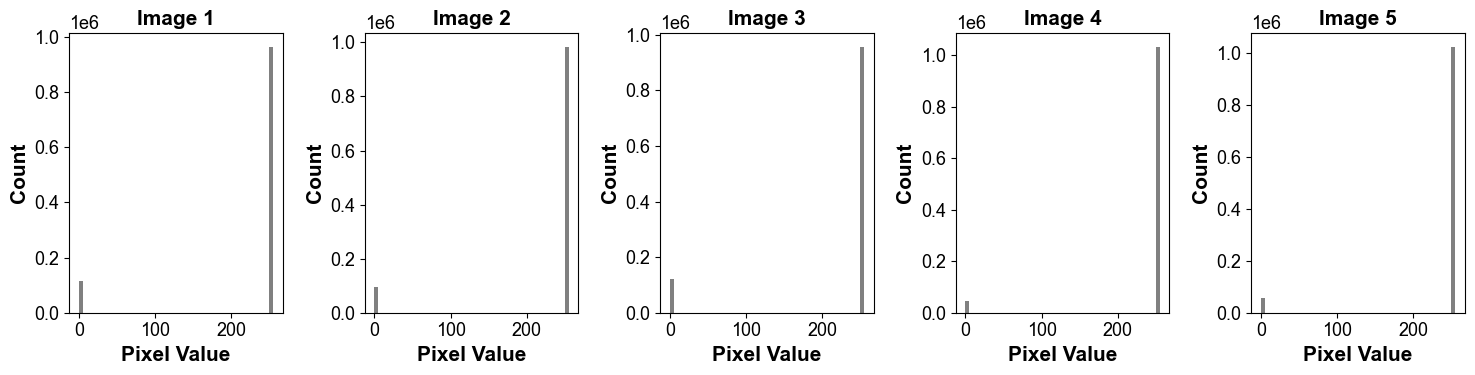

In [120]:
img_folder = r"C:\Users\SSN\Desktop\College_Sem\6th_Sem_Materials\ML Lab\Experiment_1\Img"

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

# Skip first invalid row and take first 5 valid images
for i, path in enumerate(df['image_path'][1:6]):
    # Get the filename only
    img_file = os.path.basename(path)
    img_path = os.path.join(img_folder, img_file)

    # Check if file exists
    if not os.path.exists(img_path):
        print("Image not found:", img_path)
        continue

    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Failed to read:", img_path)
        continue

    # Plot histogram
    axes[i].hist(img.ravel(), bins=50, color='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].set_xlabel("Pixel Value")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

No valid images found for class label


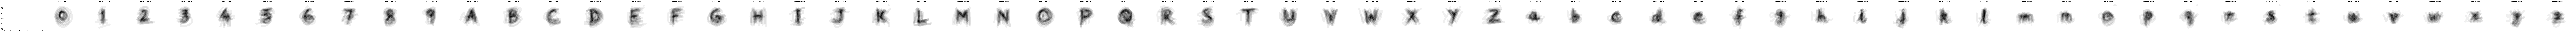

In [122]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_folder = r"C:\Users\SSN\Desktop\College_Sem\6th_Sem_Materials\ML Lab\Experiment_1\Img"

# get unique class labels
classes = df['label'].unique()

fig, axes = plt.subplots(1, len(classes), figsize=(5*len(classes), 4))

for i, label in enumerate(classes):
    imgs = []
    # skip first row (invalid) and take first 20 images
    for path in df[df['label']==label]['image_path'][1:21]:
        img_file = os.path.basename(path)
        img_path = os.path.join(img_folder, img_file)

        if not os.path.exists(img_path):
            print("Image not found:", img_path)
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Failed to read:", img_path)
            continue

        imgs.append(img)

    if len(imgs) == 0:
        print(f"No valid images found for class {label}")
        continue

    mean_img = np.mean(imgs, axis=0)
    axes[i].imshow(mean_img, cmap='gray')
    axes[i].set_title(f"Mean Class {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


C:\Users\SSN\AppData\Local\Temp\ipykernel_13156\3749077724.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Missing','Exists'])


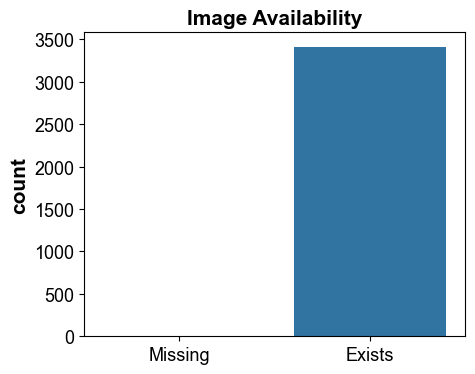

In [123]:
import os

exists = []
for path in df['image_path']:
    exists.append(os.path.exists(path))

fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.countplot(x=exists, ax=ax)
ax.set_xticklabels(['Missing','Exists'])
ax.set_title("Image Availability")

plt.tight_layout()
plt.show()
